# Hackathon

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data

In [2]:
#reading training data
df_travel=pd.read_csv("Traveldata_train.csv")
df_survey=pd.read_csv("Surveydata_train.csv")

#saving copy
data_travel_copy=df_travel.copy()
data_survey_copy=df_survey.copy()

#reading test data 
df_travel_test=pd.read_csv("Traveldata_test.csv")
df_survey_test=pd.read_csv("Surveydata_test.csv")

# #saving copy
data_travel_test_copy=df_travel_test.copy()
data_survey_test_copy=df_survey_test.copy()

## Reality checks

In [3]:
print(df_travel.info())
print(df_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID         

In [4]:
df_survey["Overall_Experience"]=df_survey["Overall_Experience"].astype("object")
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  object
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

#### Taking a look on the Training data

##### Travel: 

In [5]:
df_travel.head()

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0

In [6]:
df_travel.tail()

ID Gender   Customer_Type   Age      Type_Travel Travel_Class  \
94374  98894375   Male  Loyal Customer  32.0  Business Travel     Business   
94375  98894376   Male  Loyal Customer  44.0  Business Travel     Business   
94376  98894377   Male             NaN  63.0  Business Travel     Business   
94377  98894378   Male  Loyal Customer  16.0  Personal Travel          Eco   
94378  98894379   Male  Loyal Customer  54.0              NaN          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
94374             1357                     83.0                  125.0  
94375              592                      5.0                   11.0  
94376             2794                      0.0                    0.0  
94377             2744                      0.0                    0.0  
94378             2107                     28.0                   28.0

In [7]:
df_travel.sample(10)

ID  Gender      Customer_Type   Age      Type_Travel  \
18258  98818259  Female                NaN  46.0  Business Travel   
70786  98870787  Female     Loyal Customer  37.0  Business Travel   
44013  98844014  Female     Loyal Customer  65.0  Personal Travel   
53780  98853781    Male     Loyal Customer  56.0  Business Travel   
40147  98840148    Male  Disloyal Customer  48.0  Business Travel   
60185  98860186  Female     Loyal Customer  66.0  Personal Travel   
56310  98856311    Male     Loyal Customer  60.0  Personal Travel   
61993  98861994    Male     Loyal Customer  10.0  Business Travel   
81232  98881233    Male     Loyal Customer  40.0  Business Travel   
89204  98889205  Female     Loyal Customer  27.0  Business Travel   

      Travel_Class  Travel_Distance  Departure_Delay_in_Mins  \
18258          Eco              446                      0.0   
70786     Business             2407                      0.0   
44013          Eco              922                      5.0   
53780     Business             2747                      0.0   
40147     Business             2723                     11.0   
60185          Eco               62                      0.0   
56310          Eco             1869                     17.0   
61993     Business             2925                     73.0   
81232     Business             1850                      0.0   
89204     Business             4870                      5.0   

       Arrival_Delay_in_Mins  
18258                    3.0  
70786                    0.0  
44013                    2.0  
53780                    0.0  
40147                    0.0  
60185                    0.0  
56310                   10.0  
61993                    NaN  
81232                    0.0  
89204                    3.0

##### Survey:

In [8]:
df_survey.head()

ID Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                  0  Needs Improvement  Green Car   
1  98800002                  0               Poor   Ordinary   
2  98800003                  1  Needs Improvement  Green Car   
3  98800004                  0         Acceptable   Ordinary   
4  98800005                  1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement                NaN  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improvement                  Good      Excellent   
3           Acceptable     Needs Improvement     Acceptable   
4    Needs Improvement                  Good      Excellent   

  Ease_of_Online_Booking    Onboard_Service            Legroom  \
0      Needs Improvement  Needs Improvement         Acceptable   
1                   Good          Excellent  Needs Improvement   
2              Excellent          Excellent          Excellent   
3             Acceptable         Acceptable         Acceptable   
4                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  
0  Needs Improvement               Good  Needs Improvement            Poor  
1               Poor  Needs Improvement               Good            Good  
2          Excellent               Good          Excellent       Excellent  
3         Acceptable               Good         Acceptable      Acceptable  
4               Good               Good               Good            Good

In [9]:
df_survey.tail()

ID Overall_Experience       Seat_Comfort Seat_Class  \
94374  98894375                  0               Poor   Ordinary   
94375  98894376                  1               Good   Ordinary   
94376  98894377                  1  Needs Improvement  Green Car   
94377  98894378                  0  Needs Improvement   Ordinary   
94378  98894379                  0         Acceptable   Ordinary   

      Arrival_Time_Convenient           Catering  Platform_Location  \
94374                    Good               Good         Convenient   
94375                    Good               Good         Convenient   
94376       Needs Improvement  Needs Improvement  Needs Improvement   
94377                     NaN  Needs Improvement         Convenient   
94378                    Poor         Acceptable         Manageable   

      Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
94374                 Poor                  Poor           Poor   
94375    Needs Improvement             Excellent      Excellent   
94376                 Good             Excellent           Good   
94377                 Good     Needs Improvement           Good   
94378           Acceptable            Acceptable     Acceptable   

      Ease_of_Online_Booking Onboard_Service     Legroom Baggage_Handling  \
94374                   Poor            Good        Good             Good   
94375             Acceptable      Acceptable  Acceptable       Acceptable   
94376                   Good            Good        Good             Good   
94377                   Good      Acceptable        Good             Good   
94378             Acceptable            Poor        Good             Good   

         CheckIn_Service Cleanliness Online_Boarding  
94374  Needs Improvement        Good            Poor  
94375               Good  Acceptable            Good  
94376         Acceptable        Good      Acceptable  
94377               Good   Excellent            Good  
94378               Poor        Good      Acceptable

In [10]:
df_survey.sample(10)

ID Overall_Experience       Seat_Comfort Seat_Class  \
33028  98833029                  1          Excellent  Green Car   
20168  98820169                  1  Needs Improvement   Ordinary   
36017  98836018                  0               Poor  Green Car   
72491  98872492                  1  Needs Improvement   Ordinary   
90019  98890020                  0               Good   Ordinary   
93665  98893666                  1               Good   Ordinary   
8646   98808647                  1  Needs Improvement  Green Car   
60201  98860202                  1               Good  Green Car   
82532  98882533                  1         Acceptable  Green Car   
33157  98833158                  1          Excellent  Green Car   

      Arrival_Time_Convenient           Catering  Platform_Location  \
33028               Excellent          Excellent    Very Convenient   
20168                     NaN  Needs Improvement  Needs Improvement   
36017                    Good               Poor         Convenient   
72491       Needs Improvement  Needs Improvement  Needs Improvement   
90019                    Good               Good         Manageable   
93665                    Good               Good         Convenient   
8646                     Good  Needs Improvement  Needs Improvement   
60201                    Good               Good         Convenient   
82532              Acceptable         Acceptable         Manageable   
33157                     NaN          Excellent    Very Convenient   

      Onboard_Wifi_Service Onboard_Entertainment     Online_Support  \
33028            Excellent             Excellent               Good   
20168           Acceptable             Excellent          Excellent   
36017                 Good                  Poor         Acceptable   
72491            Excellent                  Good               Good   
90019    Needs Improvement                  Good  Needs Improvement   
93665           Acceptable                  Good  Needs Improvement   
8646     Needs Improvement     Needs Improvement  Needs Improvement   
60201            Excellent             Excellent               Good   
82532           Acceptable             Excellent               Good   
33157    Needs Improvement                  Good               Good   

      Ease_of_Online_Booking Onboard_Service            Legroom  \
33028                   Good            Good               Good   
20168                   Good            Good               Good   
36017                   Good            Poor  Needs Improvement   
72491                   Good            Good               Good   
90019      Needs Improvement            Poor               Poor   
93665                   Good             NaN               Good   
8646                    Good            Good               Good   
60201              Excellent             NaN          Excellent   
82532              Excellent       Excellent          Excellent   
33157                   Good            Good               Good   

      Baggage_Handling    CheckIn_Service Cleanliness    Online_Boarding  
33028             Good               Good        Good               Good  
20168             Good          Excellent        Good          Excellent  
36017             Good  Needs Improvement        Good               Good  
72491             Good         Acceptable        Good          Excellent  
90019       Acceptable               Good        Good  Needs Improvement  
93665             Good               Good        Good          Excellent  
8646              Good         Acceptable        Good               Poor  
60201        Excellent         Acceptable   Excellent         Acceptable  
82532        Excellent         Acceptable   Excellent         Acceptable  
33157             Good         Acceptable        Good               Good

##### Respondiendo dudas sobre  las bases:

In [11]:
print("shape travel:",df_travel.shape,"\n shape de survey:",df_survey.shape)

shape travel: (94379, 9) 
 shape de survey: (94379, 17)


In [12]:
print("cant de usuarios unicos en travel:",df_travel["ID"].nunique())
print("cant de usurios unicos en survey:",df_survey["ID"].nunique())

cant de usuarios unicos en travel: 94379
cant de usurios unicos en survey: 94379


In [13]:
id_unicos_survey=set(df_survey["ID"].unique())
id_unicos_travel=set(df_travel["ID"].unique())

union_ids=id_unicos_survey.union(id_unicos_travel)
intersection_ids= id_unicos_survey.intersection(id_unicos_travel)

print("Los usuarios de travel son los mismos de survey ? ",union_ids==intersection_ids)

Los usuarios de travel son los mismos de survey ?  True


In [14]:
#Verificando duplicados en general
print("hay rows duplicadas en survey?: ",df_survey.duplicated().any())
print("hay rows duplicadas en travel?: ",df_travel.duplicated().any())

hay rows duplicadas en survey?:  False
hay rows duplicadas en travel?:  False


In [15]:
print("hay mas de  un viaje por usurio en travel? ",df_travel.duplicated(subset=["ID"]).any())
print("hay mas de  un viaje por usurio en survey? ",df_survey.duplicated(subset=["ID"]).any())

hay mas de  un viaje por usurio en travel?  False
hay mas de  un viaje por usurio en survey?  False


In [16]:
print(df_survey.columns)
print(df_travel.columns)

Index(['ID', 'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')
Index(['ID', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],
      dtype='object')


In [17]:
df=df_travel.merge(df_survey,on="ID",how="left",indicator=True)
df["_merge"].value_counts()

_merge
both          94379
left_only         0
right_only        0
Name: count, dtype: int64

In [18]:
df.drop(columns=["_merge"],inplace=True)

In [19]:
df.head()

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              272                      0.0                    5.0   
1             2200                      9.0                    0.0   
2             1061                     77.0                  119.0   
3              780                     13.0                   18.0   
4             1981                      0.0                    0.0   

  Overall_Experience  ... Onboard_Wifi_Service Onboard_Entertainment  \
0                  0  ...                 Good     Needs Improvement   
1                  0  ...                 Good                  Poor   
2                  1  ...    Needs Improvement                  Good   
3                  0  ...           Acceptable     Needs Improvement   
4                  1  ...    Needs Improvement                  Good   

  Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom  \
0     Acceptable      Needs Improvement  Needs Improvement         Acceptable   
1           Good                   Good          Excellent  Needs Improvement   
2      Excellent              Excellent          Excellent          Excellent   
3     Acceptable             Acceptable         Acceptable         Acceptable   
4      Excellent                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  
0  Needs Improvement               Good  Needs Improvement            Poor  
1               Poor  Needs Improvement               Good            Good  
2          Excellent               Good          Excellent       Excellent  
3         Acceptable               Good         Acceptable      Acceptable  
4               Good               Good               Good            Good  

[5 rows x 25 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  object 
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [21]:
df.dtypes.value_counts()

object     20
float64     3
int64       2
Name: count, dtype: int64

In [22]:
columns_cat=df.select_dtypes(include="object").columns
columns_cat

Index(['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

In [23]:
columns_num=df.select_dtypes(exclude="object").columns
columns_num

Index(['ID', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins'],
      dtype='object')

Observaciones:
- Tenemos un data ser de 94379 filas y 25 columnas
- De las 25 columnas 20 son categoricas y 5 son numericas (3 tipo float y 3 tipo int)
- Las variables categoricas son: `['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding','Overall_Experience']`

- `Overall_Experience` es nuestro target

- Las varibles numericas son : `['ID', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins',]`.

 - De las varibles numericas  `Departure_Delay_in_Mins` ,` Arrival_Delay_in_Mins` y `Age` son de tipo float y el retos es tipo int

 - La varieble ID podria ser dropeada mas adelante ya que cada fila representa un usurio distinto


#### Taking a look on the Test data

##### Travel test: 

In [24]:
df_travel_test.head()

ID  Gender      Customer_Type   Age      Type_Travel Travel_Class  \
0  99900001  Female                NaN  36.0  Business Travel     Business   
1  99900002  Female  Disloyal Customer  21.0  Business Travel     Business   
2  99900003    Male     Loyal Customer  60.0  Business Travel     Business   
3  99900004  Female     Loyal Customer  29.0  Personal Travel          Eco   
4  99900005    Male  Disloyal Customer  18.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              532                      0.0                    0.0  
1             1425                      9.0                   28.0  
2             2832                      0.0                    0.0  
3             1352                      0.0                    0.0  
4             1610                     17.0                    0.0

In [25]:
df_travel_test.tail()

ID  Gender      Customer_Type   Age      Type_Travel  \
35597  99935598    Male     Loyal Customer   8.0  Personal Travel   
35598  99935599  Female     Loyal Customer  53.0  Business Travel   
35599  99935600    Male  Disloyal Customer  22.0  Business Travel   
35600  99935601  Female     Loyal Customer  67.0  Personal Travel   
35601  99935602    Male                NaN  20.0  Personal Travel   

      Travel_Class  Travel_Distance  Departure_Delay_in_Mins  \
35597          Eco             1334                      0.0   
35598     Business             1772                      0.0   
35599          Eco             1180                      0.0   
35600          Eco              420                     23.0   
35601          Eco             1680                      0.0   

       Arrival_Delay_in_Mins  
35597                    0.0  
35598                    0.0  
35599                    0.0  
35600                   16.0  
35601                    0.0

In [26]:
df_travel_test.sample(10)

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
6168   99906169    Male  Loyal Customer  50.0  Business Travel     Business   
24779  99924780  Female  Loyal Customer  59.0  Business Travel     Business   
20175  99920176  Female  Loyal Customer  31.0  Business Travel     Business   
13933  99913934  Female  Loyal Customer  41.0  Business Travel     Business   
35189  99935190  Female             NaN  57.0  Business Travel     Business   
25277  99925278    Male  Loyal Customer  55.0  Personal Travel          Eco   
22980  99922981  Female  Loyal Customer  49.0  Business Travel          Eco   
24210  99924211  Female  Loyal Customer  46.0              NaN     Business   
8638   99908639    Male  Loyal Customer  31.0  Business Travel     Business   
28256  99928257    Male  Loyal Customer  46.0  Personal Travel          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
6168              1222                      0.0                    0.0  
24779             3721                      0.0                    0.0  
20175             4419                      0.0                    0.0  
13933             1028                      0.0                    0.0  
35189             1044                     86.0                   82.0  
25277              981                      0.0                    0.0  
22980              268                      0.0                    0.0  
24210             1316                      0.0                    0.0  
8638              3374                      0.0                    0.0  
28256             2046                      0.0                    2.0

##### Survey Test:

In [27]:
df_survey_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

In [28]:
df_survey_test.head()

ID    Seat_Comfort Seat_Class Arrival_Time_Convenient    Catering  \
0  99900001      Acceptable  Green Car              Acceptable  Acceptable   
1  99900002  Extremely Poor   Ordinary                    Good        Poor   
2  99900003       Excellent   Ordinary               Excellent   Excellent   
3  99900004      Acceptable  Green Car               Excellent  Acceptable   
4  99900005       Excellent   Ordinary          Extremely Poor   Excellent   

   Platform_Location Onboard_Wifi_Service Onboard_Entertainment  \
0         Manageable    Needs Improvement             Excellent   
1         Manageable           Acceptable                  Poor   
2    Very Convenient            Excellent             Excellent   
3    Very Convenient                 Poor            Acceptable   
4  Needs Improvement            Excellent             Excellent   

  Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom  \
0           Good              Excellent          Excellent          Excellent   
1     Acceptable             Acceptable          Excellent         Acceptable   
2      Excellent      Needs Improvement  Needs Improvement  Needs Improvement   
3      Excellent                   Poor         Acceptable  Needs Improvement   
4      Excellent              Excellent                NaN         Acceptable   

    Baggage_Handling CheckIn_Service        Cleanliness Online_Boarding  
0          Excellent            Good          Excellent            Poor  
1               Good      Acceptable          Excellent      Acceptable  
2  Needs Improvement            Good  Needs Improvement       Excellent  
3          Excellent       Excellent          Excellent            Poor  
4          Excellent       Excellent          Excellent       Excellent

In [29]:
df_survey_test.tail()

ID       Seat_Comfort Seat_Class Arrival_Time_Convenient  \
35597  99935598  Needs Improvement  Green Car               Excellent   
35598  99935599  Needs Improvement   Ordinary       Needs Improvement   
35599  99935600               Good  Green Car          Extremely Poor   
35600  99935601          Excellent   Ordinary               Excellent   
35601  99935602               Good   Ordinary              Acceptable   

                Catering  Platform_Location Onboard_Wifi_Service  \
35597  Needs Improvement         Manageable           Acceptable   
35598               Good  Needs Improvement           Acceptable   
35599               Good  Needs Improvement    Needs Improvement   
35600          Excellent       Inconvenient           Acceptable   
35601               Good         Manageable                 Poor   

      Onboard_Entertainment Online_Support Ease_of_Online_Booking  \
35597     Needs Improvement     Acceptable             Acceptable   
35598             Excellent      Excellent                   Good   
35599                  Good           Poor      Needs Improvement   
35600             Excellent           Good              Excellent   
35601                  Good           Poor                   Poor   

      Onboard_Service     Legroom Baggage_Handling    CheckIn_Service  \
35597            Good   Excellent             Good         Acceptable   
35598            Good        Good             Good         Acceptable   
35599            Poor  Acceptable             Poor               Poor   
35600       Excellent   Excellent        Excellent         Acceptable   
35601      Acceptable        Good             Good  Needs Improvement   

      Cleanliness    Online_Boarding  
35597        Good         Acceptable  
35598        Good               Good  
35599   Excellent  Needs Improvement  
35600   Excellent               Good  
35601        Good               Poor

In [30]:
df_survey_test.sample(10)

ID       Seat_Comfort Seat_Class Arrival_Time_Convenient  \
5368   99905369  Needs Improvement   Ordinary                     NaN   
34413  99934414               Good  Green Car               Excellent   
17577  99917578  Needs Improvement  Green Car       Needs Improvement   
30853  99930854         Acceptable   Ordinary                    Good   
10642  99910643         Acceptable   Ordinary               Excellent   
20897  99920898         Acceptable  Green Car              Acceptable   
10262  99910263               Good   Ordinary                    Good   
25921  99925922         Acceptable   Ordinary                    Good   
14796  99914797     Extremely Poor  Green Car          Extremely Poor   
9101   99909102               Good   Ordinary                    Good   

                Catering  Platform_Location Onboard_Wifi_Service  \
5368   Needs Improvement         Manageable            Excellent   
34413               Good  Needs Improvement                 Poor   
17577  Needs Improvement         Manageable           Acceptable   
30853               Good         Convenient                 Good   
10642         Acceptable  Needs Improvement           Acceptable   
20897         Acceptable       Inconvenient           Acceptable   
10262               Good         Convenient                 Good   
25921               Good         Convenient           Acceptable   
14796     Extremely Poor         Manageable           Acceptable   
9101                Good         Convenient           Acceptable   

      Onboard_Entertainment     Online_Support Ease_of_Online_Booking  \
5368                   Poor               Poor             Acceptable   
34413                  Good               Poor                   Poor   
17577     Needs Improvement         Acceptable             Acceptable   
30853            Acceptable  Needs Improvement      Needs Improvement   
10642            Acceptable         Acceptable             Acceptable   
20897            Acceptable         Acceptable             Acceptable   
10262                  Good               Good                   Good   
25921                  Good         Acceptable             Acceptable   
14796        Extremely Poor         Acceptable             Acceptable   
9101              Excellent          Excellent             Acceptable   

         Onboard_Service            Legroom   Baggage_Handling  \
5368          Acceptable  Needs Improvement         Acceptable   
34413               Poor               Poor  Needs Improvement   
17577  Needs Improvement  Needs Improvement         Acceptable   
30853  Needs Improvement  Needs Improvement         Acceptable   
10642               Poor         Acceptable               Good   
20897          Excellent  Needs Improvement          Excellent   
10262               Poor          Excellent         Acceptable   
25921         Acceptable               Good               Good   
14796         Acceptable               Good               Good   
9101          Acceptable               Good         Acceptable   

         CheckIn_Service        Cleanliness Online_Boarding  
5368                Poor         Acceptable       Excellent  
34413          Excellent         Acceptable            Poor  
17577  Needs Improvement               Good      Acceptable  
30853               Poor  Needs Improvement            Good  
10642               Good               Poor      Acceptable  
20897          Excellent               Good      Acceptable  
10262               Good               Good            Good  
25921               Good               Good      Acceptable  
14796          Excellent               Good      Acceptable  
9101          Acceptable         Acceptable       Excellent

##### Respondiendo dudas sobre  las bases:

In [31]:
print("shape travel:",df_travel_test.shape,"\n shape de survey:",df_survey_test.shape)

shape travel: (35602, 9) 
 shape de survey: (35602, 16)


In [32]:
print("cant de usuarios unicos en travel:",df_travel_test["ID"].nunique())
print("cant de usurios unicos en survey:",df_survey_test["ID"].nunique())

cant de usuarios unicos en travel: 35602
cant de usurios unicos en survey: 35602


In [33]:
id_unicos_survey_test=set(df_survey_test["ID"].unique())
id_unicos_travel_test=set(df_travel_test["ID"].unique())

union_ids_test=id_unicos_survey_test.union(id_unicos_travel_test)
intersection_ids_test= id_unicos_survey_test.intersection(id_unicos_travel_test)

print("Los usuarios de travel son los mismos de survey ? (Test)",union_ids_test==intersection_ids_test)

Los usuarios de travel son los mismos de survey ? (Test) True


In [34]:
#Verificando duplicados en general
print("hay rows duplicadas en survey? (test): ",df_survey_test.duplicated().any())
print("hay rows duplicadas en travel? (test): ",df_travel_test.duplicated().any())

hay rows duplicadas en survey? (test):  False
hay rows duplicadas en travel? (test):  False


In [35]:
print("hay mas de  un viaje por usurio en travel? ",df_travel_test.duplicated(subset=["ID"]).any())
print("hay mas de  un viaje por usurio en survey? ",df_survey_test.duplicated(subset=["ID"]).any())

hay mas de  un viaje por usurio en travel?  False
hay mas de  un viaje por usurio en survey?  False


In [36]:
print(df_survey_test.columns)
print(df_travel_test.columns)

Index(['ID', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient',
       'Catering', 'Platform_Location', 'Onboard_Wifi_Service',
       'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking',
       'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service',
       'Cleanliness', 'Online_Boarding'],
      dtype='object')
Index(['ID', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],
      dtype='object')


In [37]:
df_final_test=df_travel_test.merge(df_survey_test,on="ID",how="left",indicator=True)
df_final_test["_merge"].value_counts()

_merge
both          35602
left_only         0
right_only        0
Name: count, dtype: int64

In [38]:
df_final_test.drop(columns=["_merge"],inplace=True)

In [39]:
df_final_test.head()

ID  Gender      Customer_Type   Age      Type_Travel Travel_Class  \
0  99900001  Female                NaN  36.0  Business Travel     Business   
1  99900002  Female  Disloyal Customer  21.0  Business Travel     Business   
2  99900003    Male     Loyal Customer  60.0  Business Travel     Business   
3  99900004  Female     Loyal Customer  29.0  Personal Travel          Eco   
4  99900005    Male  Disloyal Customer  18.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              532                      0.0                    0.0   
1             1425                      9.0                   28.0   
2             2832                      0.0                    0.0   
3             1352                      0.0                    0.0   
4             1610                     17.0                    0.0   

     Seat_Comfort  ... Onboard_Wifi_Service Onboard_Entertainment  \
0      Acceptable  ...    Needs Improvement             Excellent   
1  Extremely Poor  ...           Acceptable                  Poor   
2       Excellent  ...            Excellent             Excellent   
3      Acceptable  ...                 Poor            Acceptable   
4       Excellent  ...            Excellent             Excellent   

  Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom  \
0           Good              Excellent          Excellent          Excellent   
1     Acceptable             Acceptable          Excellent         Acceptable   
2      Excellent      Needs Improvement  Needs Improvement  Needs Improvement   
3      Excellent                   Poor         Acceptable  Needs Improvement   
4      Excellent              Excellent                NaN         Acceptable   

    Baggage_Handling CheckIn_Service        Cleanliness Online_Boarding  
0          Excellent            Good          Excellent            Poor  
1               Good      Acceptable          Excellent      Acceptable  
2  Needs Improvement            Good  Needs Improvement       Excellent  
3          Excellent       Excellent          Excellent            Poor  
4          Excellent       Excellent          Excellent       Excellent  

[5 rows x 24 columns]

In [40]:
df_final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [41]:
df_final_test.dtypes.value_counts()

object     19
float64     3
int64       2
Name: count, dtype: int64

## Training EDA

### Explorando nulos

In [42]:
cant_nulos=pd.concat([df.isnull().sum(),df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:"count",1:"percentage"})
cant_nulos.sort_values(by="percentage",ascending=False)

count  percentage
Type_Travel               9226    0.097755
Customer_Type             8951    0.094841
Arrival_Time_Convenient   8930    0.094619
Catering                  8741    0.092616
Onboard_Service           7601    0.080537
Arrival_Delay_in_Mins      357    0.003783
Baggage_Handling           142    0.001505
Online_Support              91    0.000964
Legroom                     90    0.000954
CheckIn_Service             77    0.000816
Gender                      77    0.000816
Ease_of_Online_Booking      73    0.000773
Seat_Comfort                61    0.000646
Departure_Delay_in_Mins     57    0.000604
Age                         33    0.000350
Platform_Location           30    0.000318
Onboard_Wifi_Service        30    0.000318
Onboard_Entertainment       18    0.000191
Cleanliness                  6    0.000064
Online_Boarding              6    0.000064
Seat_Class                   0    0.000000
Overall_Experience           0    0.000000
Travel_Distance              0    0.000000
Travel_Class                 0    0.000000
ID                           0    0.000000

In [43]:
#revisando categorias unicas de las varibles categoricas
# (ver si los valores coincidin y detectar valores nulos disfrasados )
for i in columns_cat:
  print(i)
  print(df[i].unique(),df[i].nunique())
  print("-"*100)

Gender
['Female' 'Male' nan] 2
----------------------------------------------------------------------------------------------------
Customer_Type
['Loyal Customer' 'Disloyal Customer' nan] 2
----------------------------------------------------------------------------------------------------
Type_Travel
[nan 'Personal Travel' 'Business Travel'] 2
----------------------------------------------------------------------------------------------------
Travel_Class
['Business' 'Eco'] 2
----------------------------------------------------------------------------------------------------
Overall_Experience
[0 1] 2
----------------------------------------------------------------------------------------------------
Seat_Comfort
['Needs Improvement' 'Poor' 'Acceptable' 'Good' 'Excellent'
 'Extremely Poor' nan] 6
----------------------------------------------------------------------------------------------------
Seat_Class
['Green Car' 'Ordinary'] 2
---------------------------------------------------

Obsrvaciones:
- Las variables/ columnas que no tienen nulos son: `Seat_Class`,`Overall_Experience`, `Travel_Distance`	,`Travel_Class`	,`ID`
- Las varibles que presetan nulos, a lo mucho tienen el 9.7 %de sus registros nulos (una cantidad despeciable considerando el tamaño de la data)
- Podriamos  Explorar  lore regitros corrspondientes  las 5 varibles/ columnas que presentan mas nulos las cuales son: `Type_Travel`, `Customer_Type`,`Arrival_Time_Convenient`, `Catering`, `Onboard_Service`. Para ver metodos de imputacion



#### Dropear NAs conjuntos 

In [44]:
df.dropna(thresh=1,axis=1).shape

(94379, 25)

In [45]:
### Ver si hay filas con un gran porcentaje de nas
total_rows= df.shape[0]

### Contar para cada threshold cuantos rows se eliminan
for i in range(int(0.3*len(df.columns))):
    rows_df_thres= len(df.dropna(thresh=len(df.columns)-i,axis=0))
    print('thresh: ', i)
    print("porcentaje de filas eliminadas: " ,1- (rows_df_thres/total_rows) )

thresh:  0
porcentaje de filas eliminadas:  0.411913667235296
thresh:  1
porcentaje de filas eliminadas:  0.05496985558227996
thresh:  2
porcentaje de filas eliminadas:  0.002797232435181596
thresh:  3
porcentaje de filas eliminadas:  0.001769461426800456
thresh:  4
porcentaje de filas eliminadas:  0.0007734771506373583
thresh:  5
porcentaje de filas eliminadas:  0.00026488943514979546
thresh:  6
porcentaje de filas eliminadas:  3.1786732217931046e-05


**Observations:**
- Al eliminar todos los NAs se eliminan el 41% de la data (thresh=0)
- Al eliminar los rows que tienen 2 o ma's NAs se eliminar el 5% de la data. Este parece ser un buen cuttoff point. Aunque no va eliminar un gran porcentaje NAs. La incertidumbre sobre la prediccion de ese individuo se reduce cuando tiene ma's nas.

**drop na eliminar 2 o ma's registros**

In [46]:
### Eliminar con el threshold que nos aseguramos que no eliminara tanta data
##?? 
#df.dropna(thresh=len(df.columns)-1, inplace=True )
#df.reset_index(inplace=True,drop=True)

**Observations:**
- Ya no hay registros con dos o ma's NAs.

In [47]:
### Nuevo shape
df.shape

(94379, 25)

#### Patrones en missing values

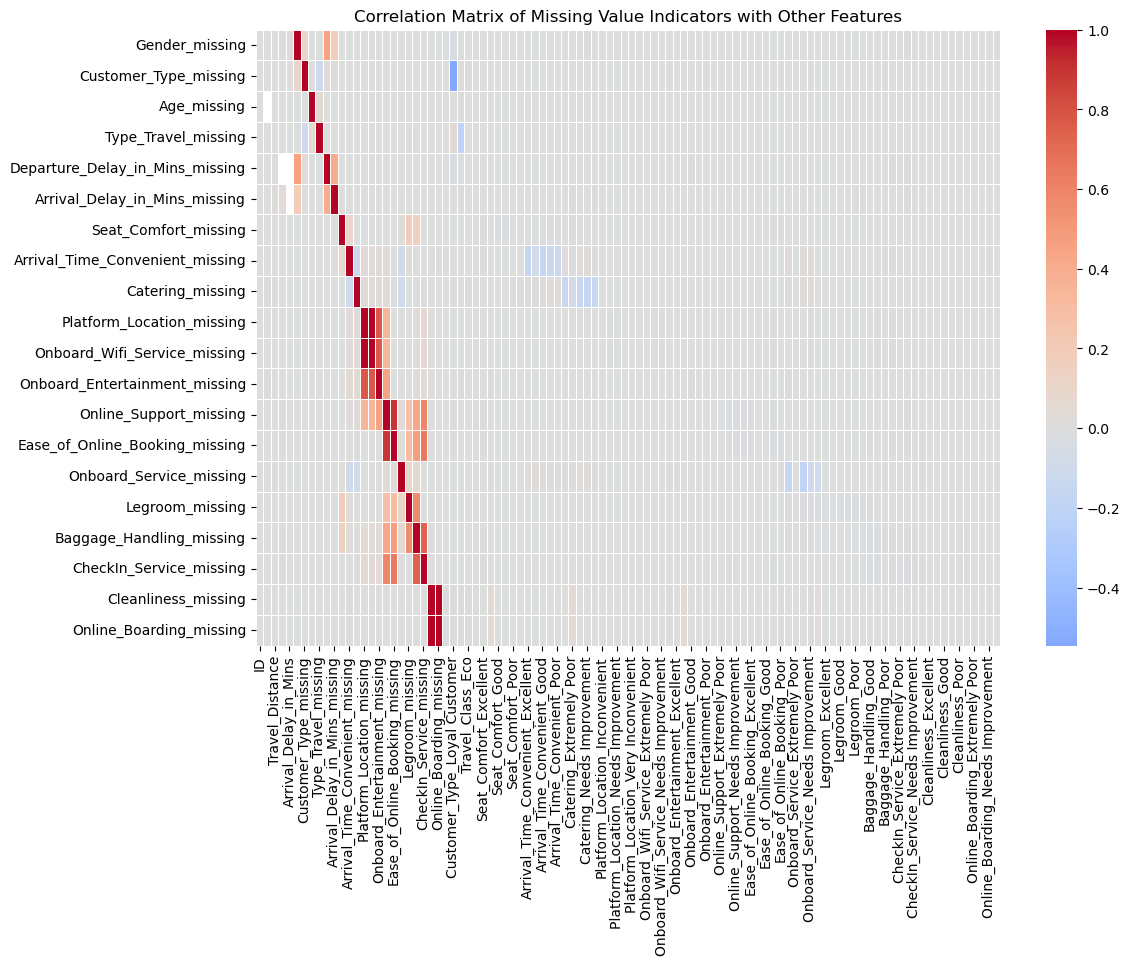

In [48]:
# Step 1: Create missing value indicators
df_analysis_copy = df.copy()
null_features = df_analysis_copy.columns[df_analysis_copy.isnull().any()]
for feature in null_features:
    df_analysis_copy[f'{feature}_missing'] = df_analysis_copy[feature].isnull().astype(int)

# Step 2: Compute correlation matrix
corr_matrix = pd.get_dummies(df_analysis_copy, drop_first=True).corr()

# Extract the correlation of missing value indicators with other features
missing_corr_matrix = corr_matrix.loc[[f'{feature}_missing' for feature in null_features], :]

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(missing_corr_matrix, cmap='coolwarm', center=0,linewidths=0.5)
plt.title('Correlation Matrix of Missing Value Indicators with Other Features')
plt.show()



**Observations**:
- Solo hay unas cuantas variables que esta'n correlacionadas con los missing values. 
- Usar kmeans para imputar puede ser excesivo porque los vecinos ma's cercanos tomara' en base a todas las variables... cuando la mayori'a no afectan a los missing values y tienen 0 correlacion
-  Por ello, seri'a mejor probar linear regression que le da un peso a la variable de acuerdo a la importancia que tiene... pero no es perfecto se enecesitari'a lasso, esta la opcion de usar random forest que tambie'n selecciona variables, pero eso agregari'a 2 hyperparametros ma's al modelo

### EDA

#### Univariate

##### Numerico:

In [49]:
columns_num=columns_num[columns_num!="ID"]

In [50]:
columns_num

Index(['Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins'],
      dtype='object')

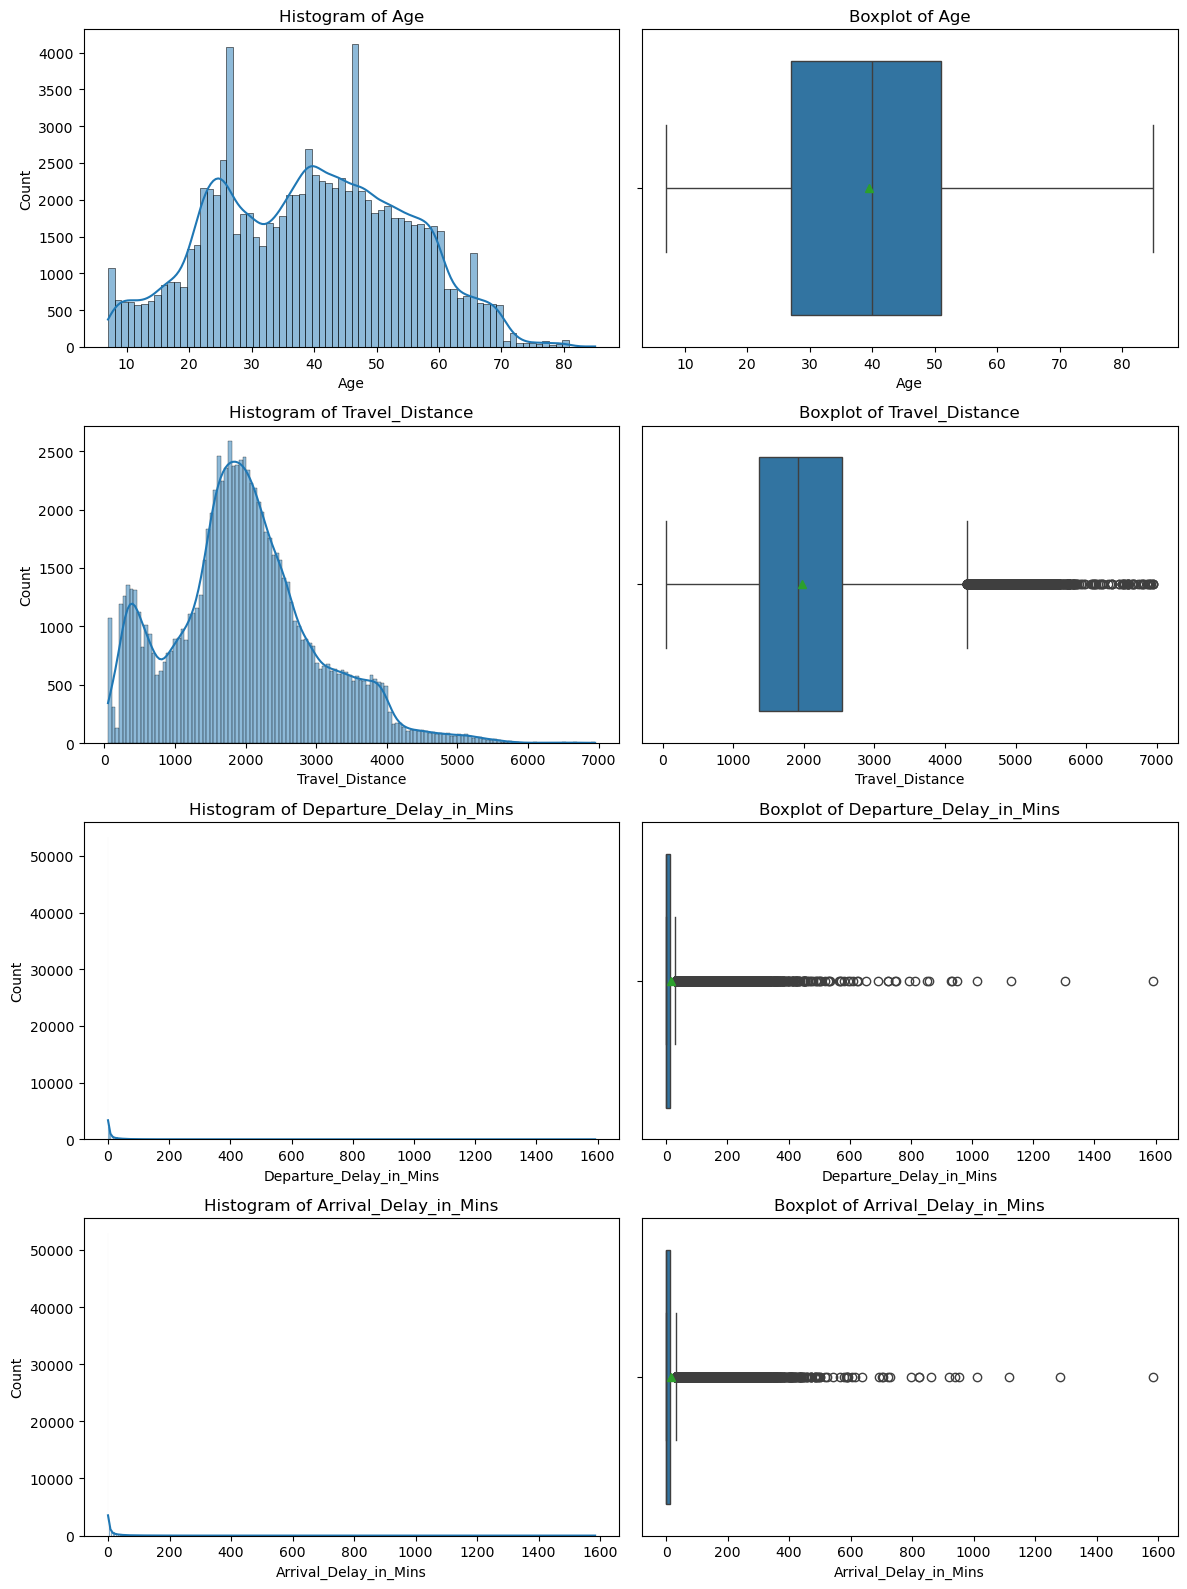

In [51]:
# Number of variables
num_vars = len(columns_num)

# Create subplots: 2 rows per variable (one for histogram, one for boxplot)
fig, axes = plt.subplots(num_vars, 2, figsize=(12, 4 * num_vars))

for i, var in enumerate(columns_num):
    # Histogram
    sns.histplot(df[var], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {var}')
    
    # Boxplot
    sns.boxplot(x=df[var], ax=axes[i, 1],showmeans=True)
    axes[i, 1].set_title(f'Boxplot of {var}')

# Adjust layout
plt.tight_layout()
plt.show()

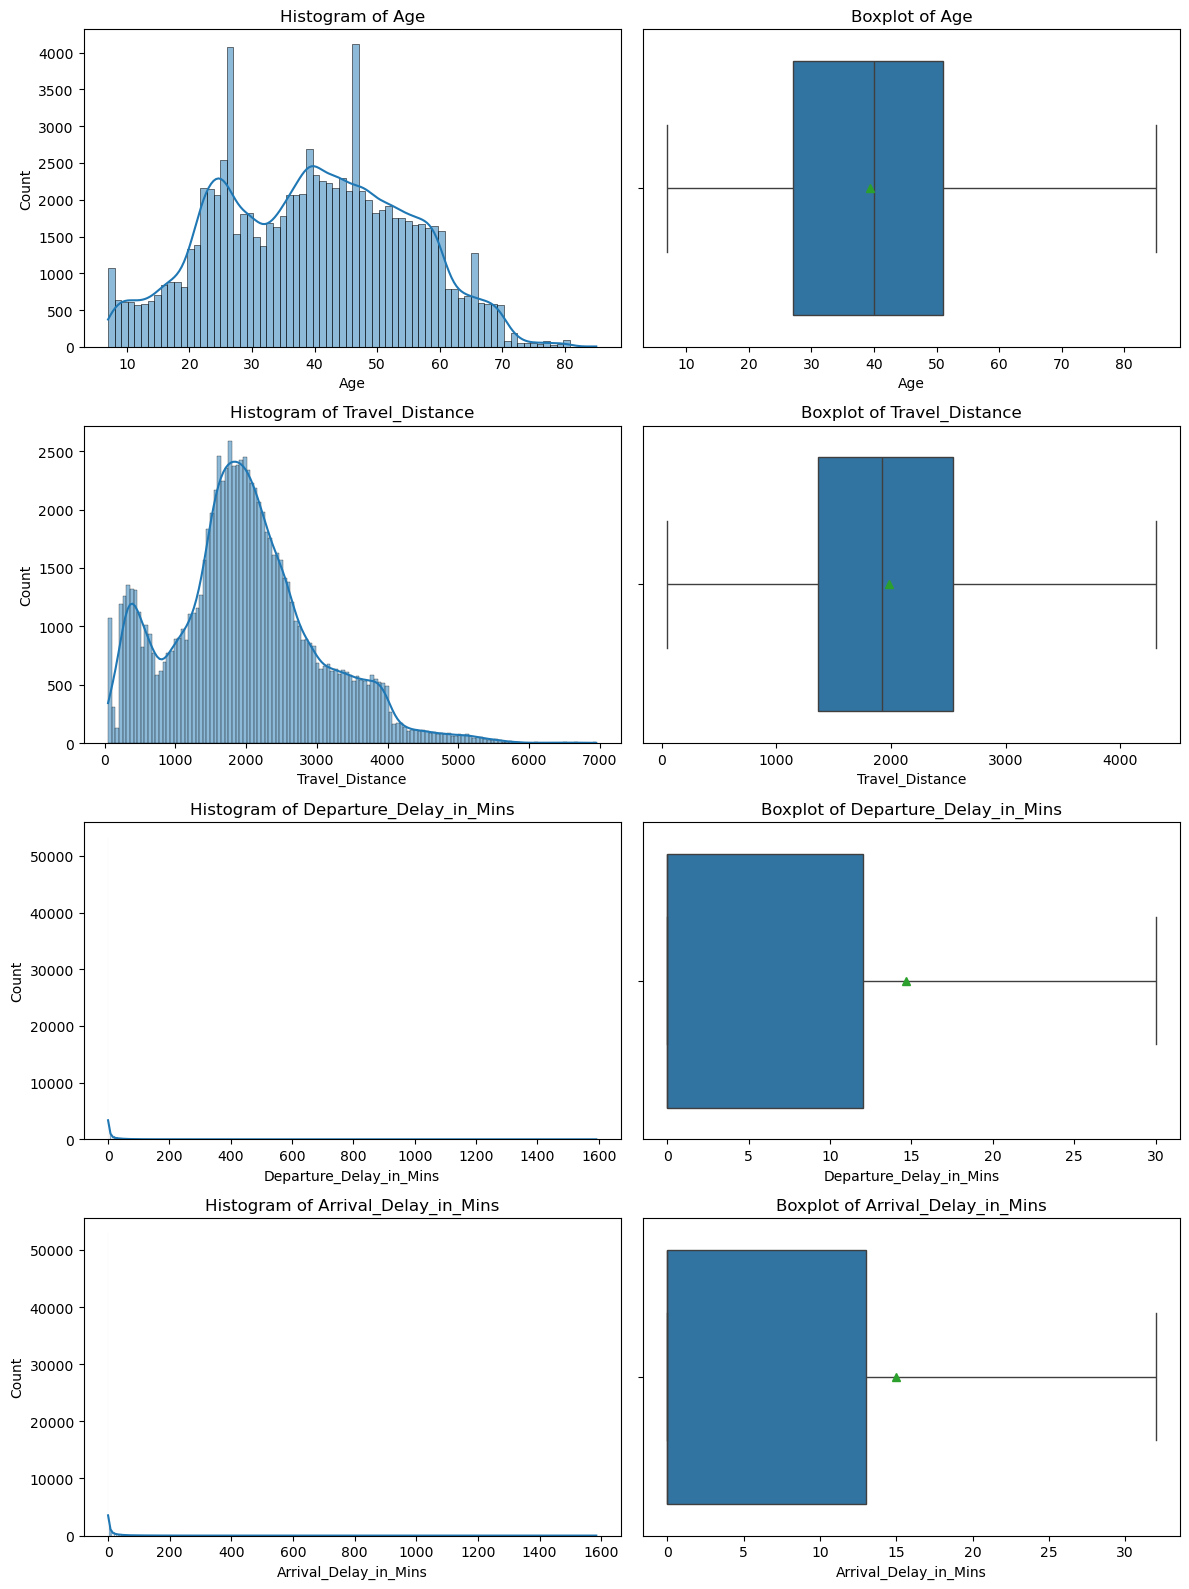

In [52]:
# Number of variables
num_vars = len(columns_num)

# Create subplots: 2 rows per variable (one for histogram, one for boxplot)
fig, axes = plt.subplots(num_vars, 2, figsize=(12, 4 * num_vars))

for i, var in enumerate(columns_num):
    # Histogram
    sns.histplot(df[var], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {var}')
    
    # Boxplot
    sns.boxplot(x=df[var], ax=axes[i, 1],showmeans=True,showfliers=False)
    axes[i, 1].set_title(f'Boxplot of {var}')

# Adjust layout
plt.tight_layout()
plt.show()

In [53]:
#Computing basic statistic of each numerical varibles 
#combination of basic statisting and skewd
df_des=pd.concat([df.describe().T,df.select_dtypes(include="number").apply(lambda x:x.skew())],axis=1).rename(columns={0:"skew"})
#adding IQR to the statistics
df_des["IQR"]=df_des["75%"]-df_des["25%"]
df_des

count          mean           std         min  \
ID                       94379.0  9.884719e+07  27245.014865  98800001.0   
Age                      94346.0  3.941965e+01     15.116632         7.0   
Travel_Distance          94379.0  1.978888e+03   1027.961019        50.0   
Departure_Delay_in_Mins  94322.0  1.464709e+01     38.138781         0.0   
Arrival_Delay_in_Mins    94022.0  1.500522e+01     38.439409         0.0   

                                25%         50%         75%         max  \
ID                       98823595.5  98847190.0  98870784.5  98894379.0   
Age                            27.0        40.0        51.0        85.0   
Travel_Distance              1359.0      1923.0      2538.0      6951.0   
Departure_Delay_in_Mins         0.0         0.0        12.0      1592.0   
Arrival_Delay_in_Mins           0.0         0.0        13.0      1584.0   

                             skew      IQR  
ID                       0.000000  47189.0  
Age                     -0.002387     24.0  
Travel_Distance          0.473058   1179.0  
Departure_Delay_in_Mins  7.156803     12.0  
Arrival_Delay_in_Mins    6.979685     13.0

In [54]:
1592/60

26.533333333333335

In [55]:
600/60

10.0

In [56]:
#definiendo bigotes de la distribucion
low_whisk= df_des["25%"]-1.5*df_des["IQR"]
low_whisk.drop(labels=["ID"],inplace=True)
print(low_whisk)
upper_whisk= df_des["75%"]+1.5*df_des["IQR"]
upper_whisk.drop(labels=["ID"],inplace=True)
print(upper_whisk)

Age                         -9.0
Travel_Distance           -409.5
Departure_Delay_in_Mins    -18.0
Arrival_Delay_in_Mins      -19.5
dtype: float64
Age                          87.0
Travel_Distance            4306.5
Departure_Delay_in_Mins      30.0
Arrival_Delay_in_Mins        32.5
dtype: float64


In [57]:
#pocentaje de ouliers por varibles
pd.concat([((df[columns_num]<low_whisk)| (df[columns_num]>upper_whisk)).sum()/df.shape[0]*100,((df[columns_num]<low_whisk)| (df[columns_num]>upper_whisk)).sum()],axis=1).rename(columns={0:"porcentaje",1:"conteo"})


porcentaje  conteo
Age                        0.000000       0
Travel_Distance            2.041768    1927
Departure_Delay_in_Mins   13.907755   13126
Arrival_Delay_in_Mins     13.392810   12640

In [58]:
#Cantidad de usuarios que presentan alguna de esas medias outliers
df.loc[((df[columns_num]<low_whisk)| (df[columns_num]>upper_whisk)).any(axis=1),"ID"].nunique()

16500

##### Categoricas

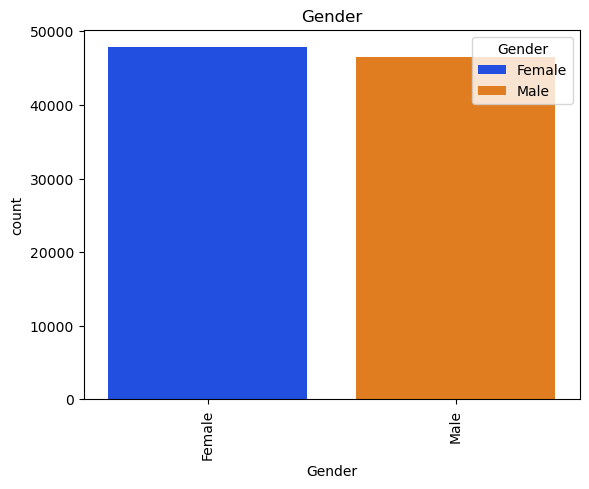

        count  proportion
Gender                   
Female  47815    0.507041
Male    46487    0.492959
------------------------------------------------------------


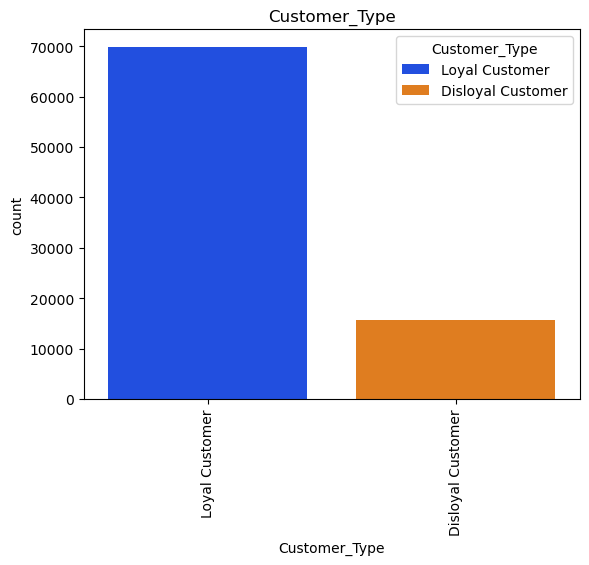

                   count  proportion
Customer_Type                       
Loyal Customer     69823    0.817332
Disloyal Customer  15605    0.182668
------------------------------------------------------------


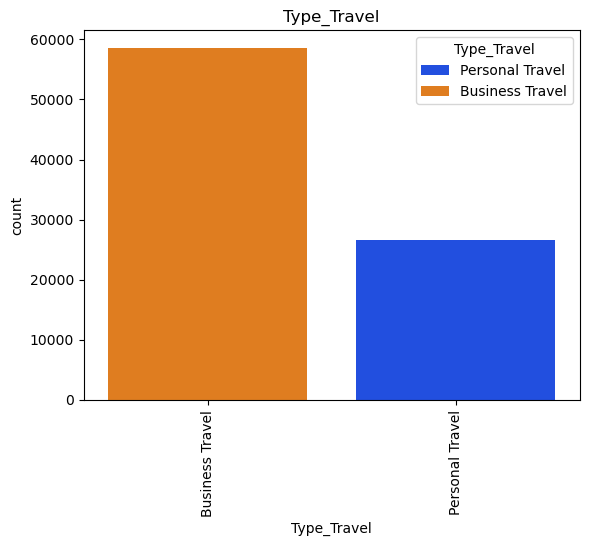

                 count  proportion
Type_Travel                       
Business Travel  58617    0.688373
Personal Travel  26536    0.311627
------------------------------------------------------------


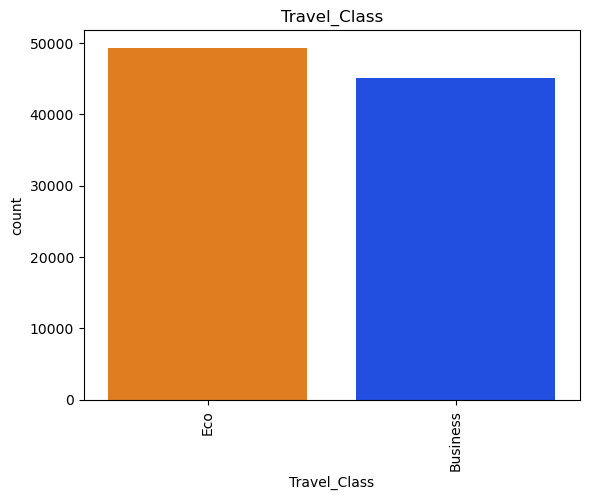

              count  proportion
Travel_Class                   
Eco           49342    0.522807
Business      45037    0.477193
------------------------------------------------------------


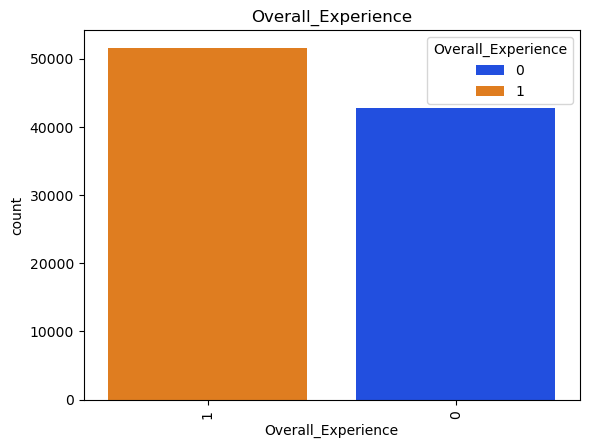

                    count  proportion
Overall_Experience                   
1                   51593    0.546658
0                   42786    0.453342
------------------------------------------------------------


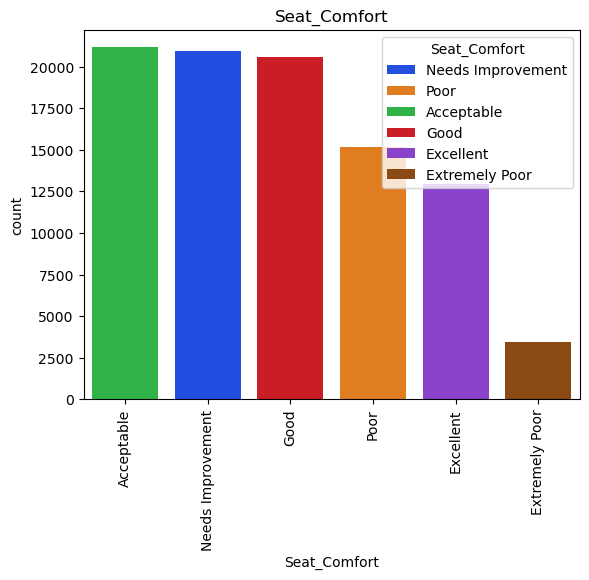

                   count  proportion
Seat_Comfort                        
Acceptable         21158    0.224326
Needs Improvement  20946    0.222079
Good               20595    0.218357
Poor               15185    0.160998
Excellent          12971    0.137524
Extremely Poor      3463    0.036716
------------------------------------------------------------


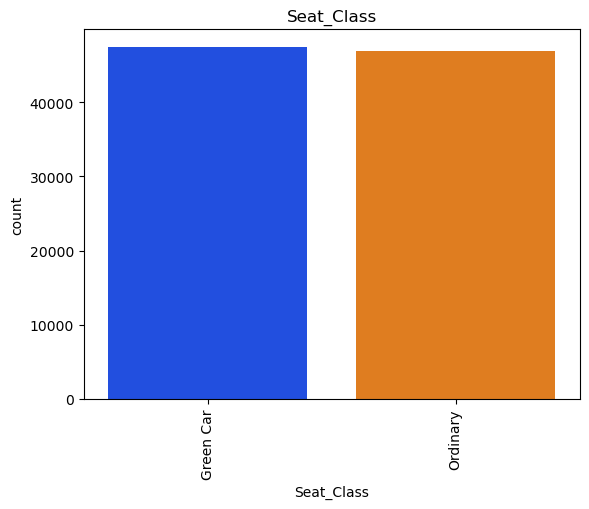

            count  proportion
Seat_Class                   
Green Car   47435    0.502601
Ordinary    46944    0.497399
------------------------------------------------------------


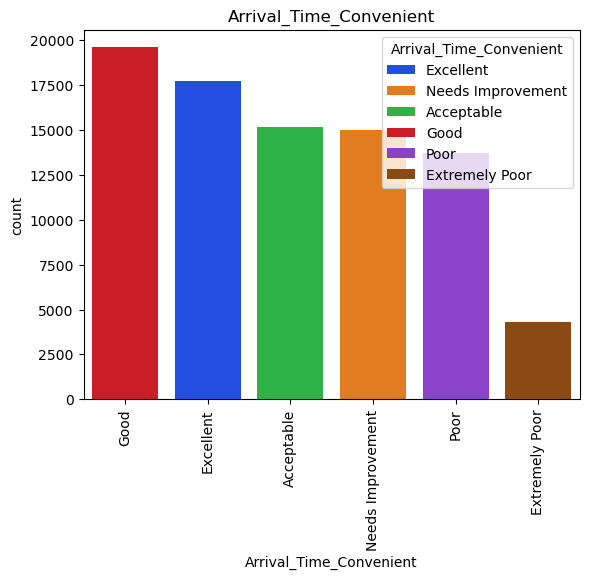

                         count  proportion
Arrival_Time_Convenient                   
Good                     19574    0.229072
Excellent                17684    0.206954
Acceptable               15177    0.177615
Needs Improvement        14990    0.175426
Poor                     13692    0.160236
Extremely Poor            4332    0.050697
------------------------------------------------------------


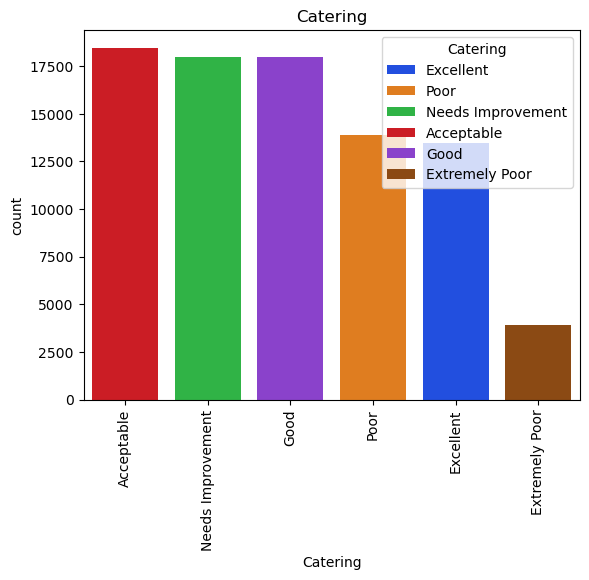

                   count  proportion
Catering                            
Acceptable         18468    0.215652
Needs Improvement  17978    0.209930
Good               17969    0.209825
Poor               13858    0.161821
Excellent          13455    0.157115
Extremely Poor      3910    0.045657
------------------------------------------------------------


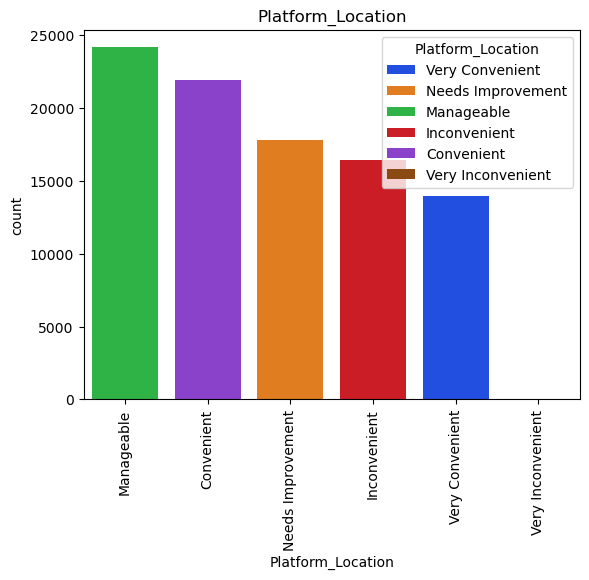

                   count  proportion
Platform_Location                   
Manageable         24173    0.256208
Convenient         21912    0.232244
Needs Improvement  17832    0.189000
Inconvenient       16449    0.174342
Very Convenient    13981    0.148184
Very Inconvenient      2    0.000021
------------------------------------------------------------


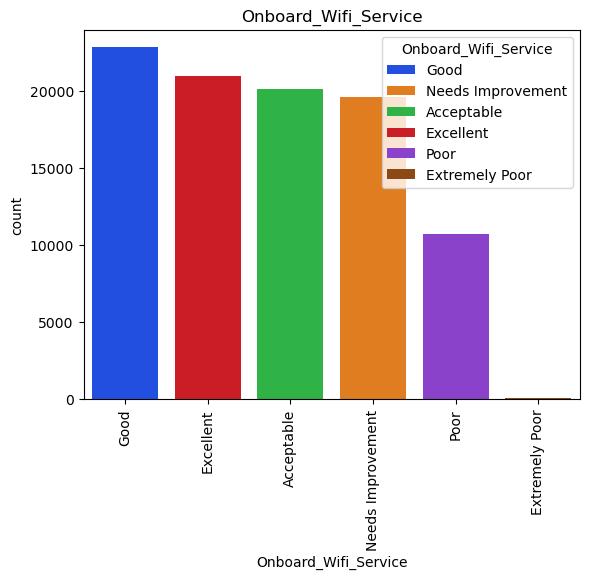

                      count  proportion
Onboard_Wifi_Service                   
Good                  22835    0.242027
Excellent             20968    0.222239
Acceptable            20118    0.213230
Needs Improvement     19596    0.207697
Poor                  10741    0.113843
Extremely Poor           91    0.000965
------------------------------------------------------------


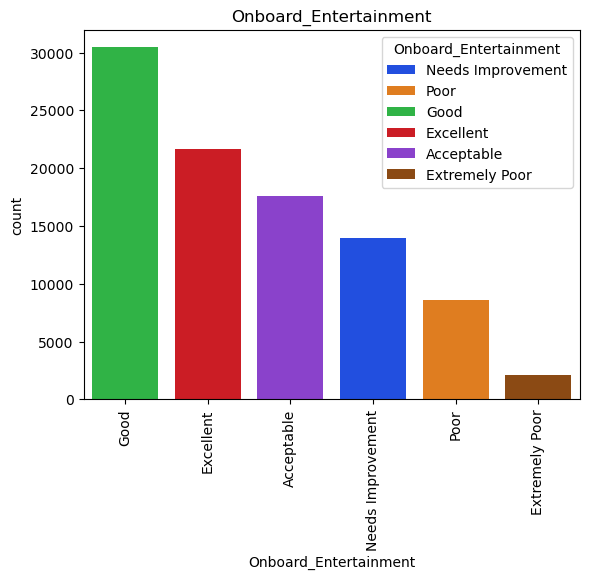

                       count  proportion
Onboard_Entertainment                   
Good                   30446    0.322654
Excellent              21644    0.229374
Acceptable             17560    0.186094
Needs Improvement      13926    0.147582
Poor                    8641    0.091574
Extremely Poor          2144    0.022721
------------------------------------------------------------


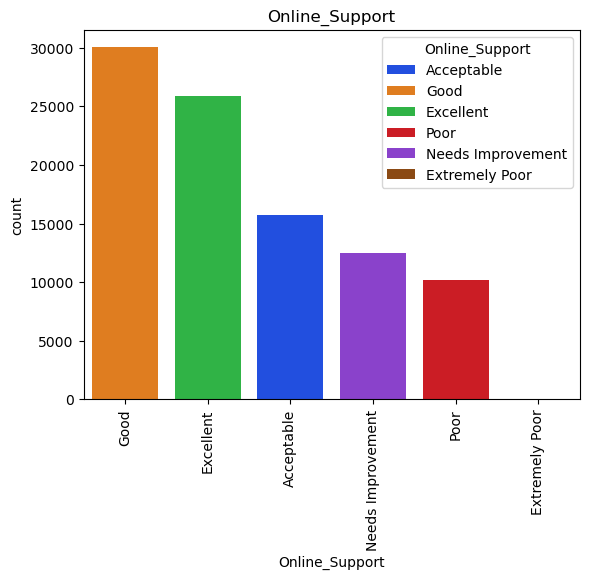

                   count  proportion
Online_Support                      
Good               30016    0.318344
Excellent          25894    0.274627
Acceptable         15702    0.166532
Needs Improvement  12508    0.132657
Poor               10167    0.107829
Extremely Poor         1    0.000011
------------------------------------------------------------


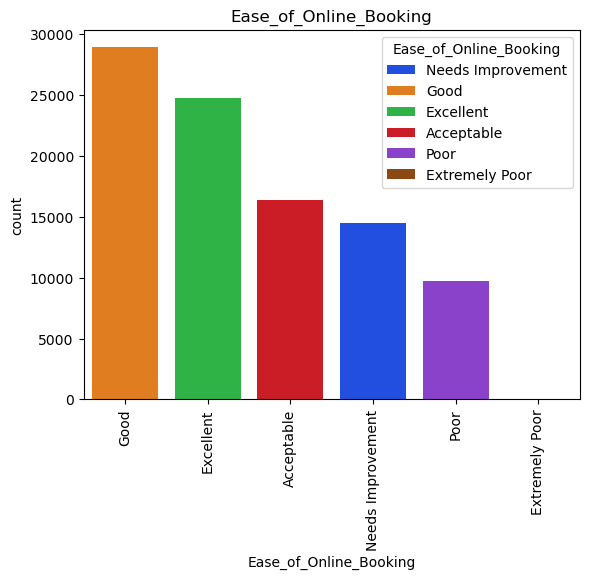

                        count  proportion
Ease_of_Online_Booking                   
Good                    28909    0.306545
Excellent               24744    0.262380
Acceptable              16390    0.173796
Needs Improvement       14479    0.153532
Poor                     9768    0.103578
Extremely Poor             16    0.000170
------------------------------------------------------------


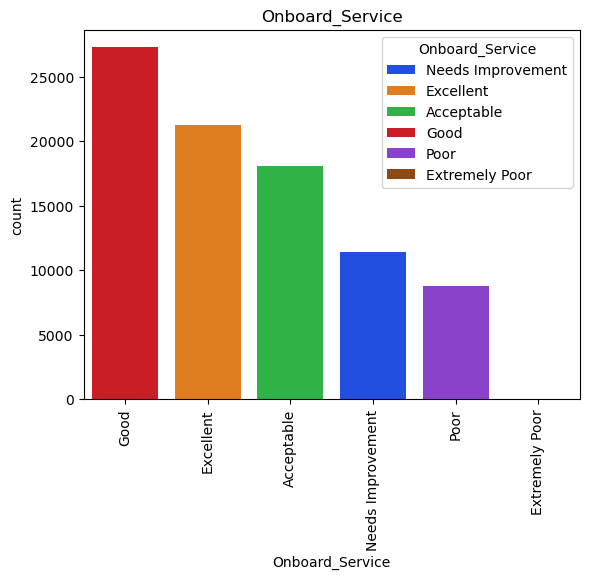

                   count  proportion
Onboard_Service                     
Good               27265    0.314193
Excellent          21272    0.245131
Acceptable         18071    0.208244
Needs Improvement  11390    0.131254
Poor                8776    0.101132
Extremely Poor         4    0.000046
------------------------------------------------------------


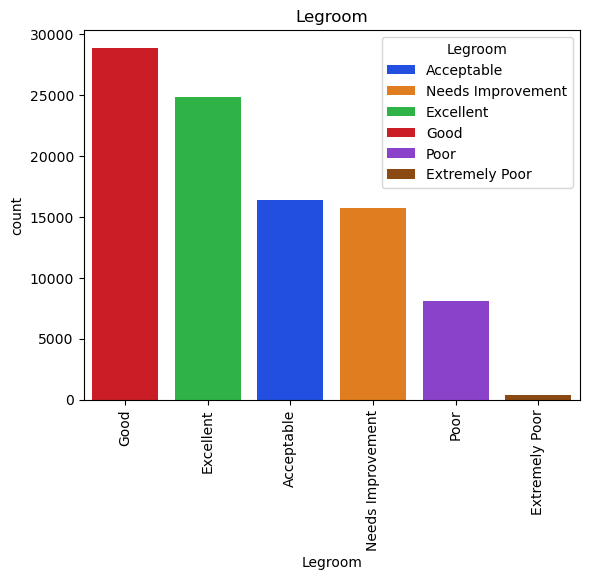

                   count  proportion
Legroom                             
Good               28870    0.306186
Excellent          24832    0.263361
Acceptable         16384    0.173764
Needs Improvement  15753    0.167071
Poor                8110    0.086012
Extremely Poor       340    0.003606
------------------------------------------------------------


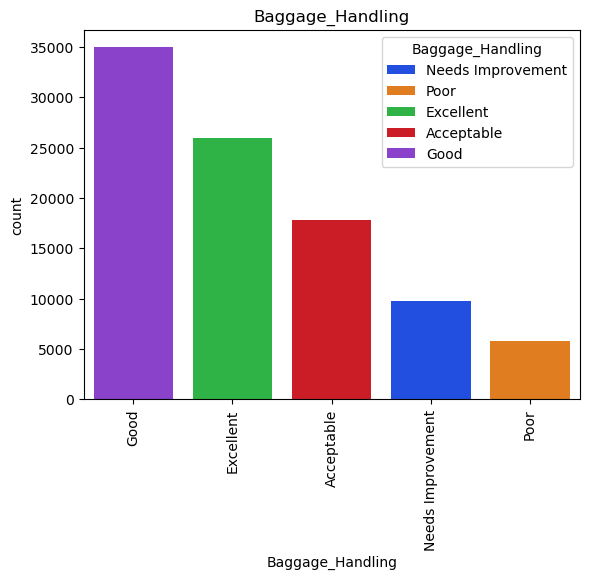

                   count  proportion
Baggage_Handling                    
Good               34944    0.370810
Excellent          26003    0.275932
Acceptable         17767    0.188535
Needs Improvement   9759    0.103558
Poor                5764    0.061165
------------------------------------------------------------


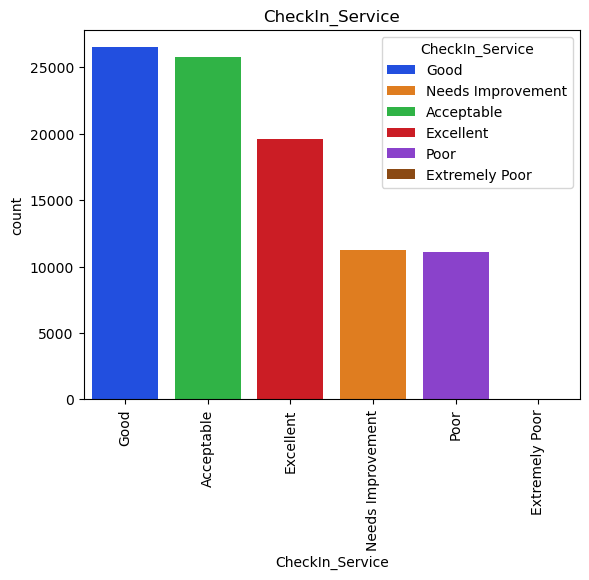

                   count  proportion
CheckIn_Service                     
Good               26502    0.281033
Acceptable         25803    0.273621
Excellent          19641    0.208278
Needs Improvement  11218    0.118958
Poor               11137    0.118099
Extremely Poor         1    0.000011
------------------------------------------------------------


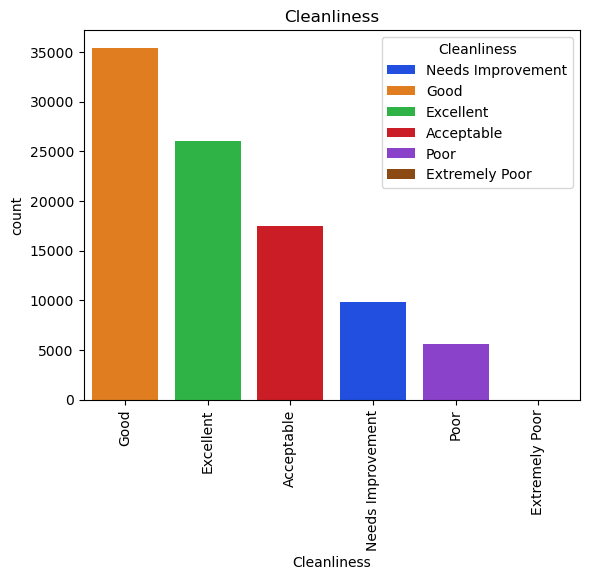

                   count  proportion
Cleanliness                         
Good               35427    0.375393
Excellent          26053    0.276064
Acceptable         17449    0.184894
Needs Improvement   9806    0.103907
Poor                5633    0.059689
Extremely Poor         5    0.000053
------------------------------------------------------------


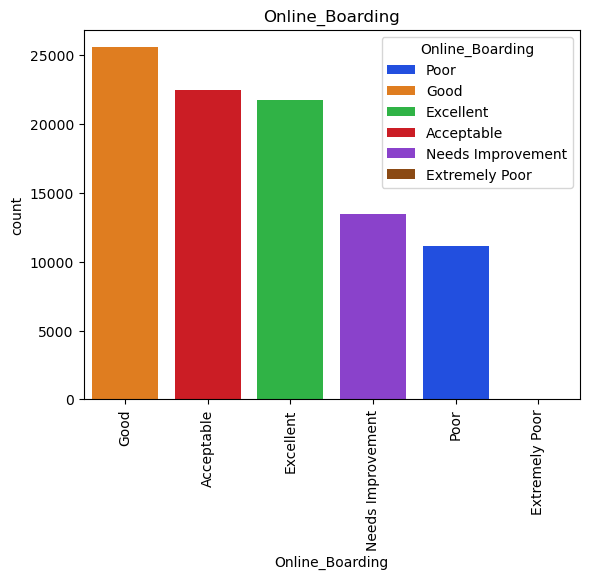

                   count  proportion
Online_Boarding                     
Good               25533    0.270554
Acceptable         22475    0.238151
Excellent          21742    0.230384
Needs Improvement  13451    0.142530
Poor               11160    0.118254
Extremely Poor        12    0.000127
------------------------------------------------------------


In [59]:
for k in columns_cat:
     
    sns.countplot(data=df,x=k,hue=k,palette="bright",order=df[k].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(k)
    plt.show()
    print(pd.concat([df[k].value_counts(),df[k].value_counts(normalize=True)],axis=1))
    print("-"*60)

#### Bivariate: 

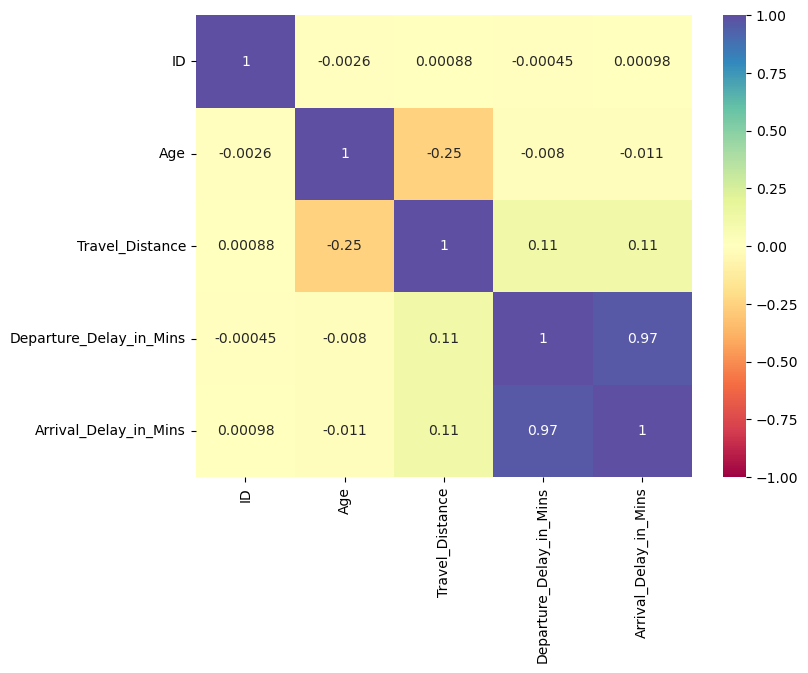

In [60]:
# Correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [61]:
columns_cat

Index(['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

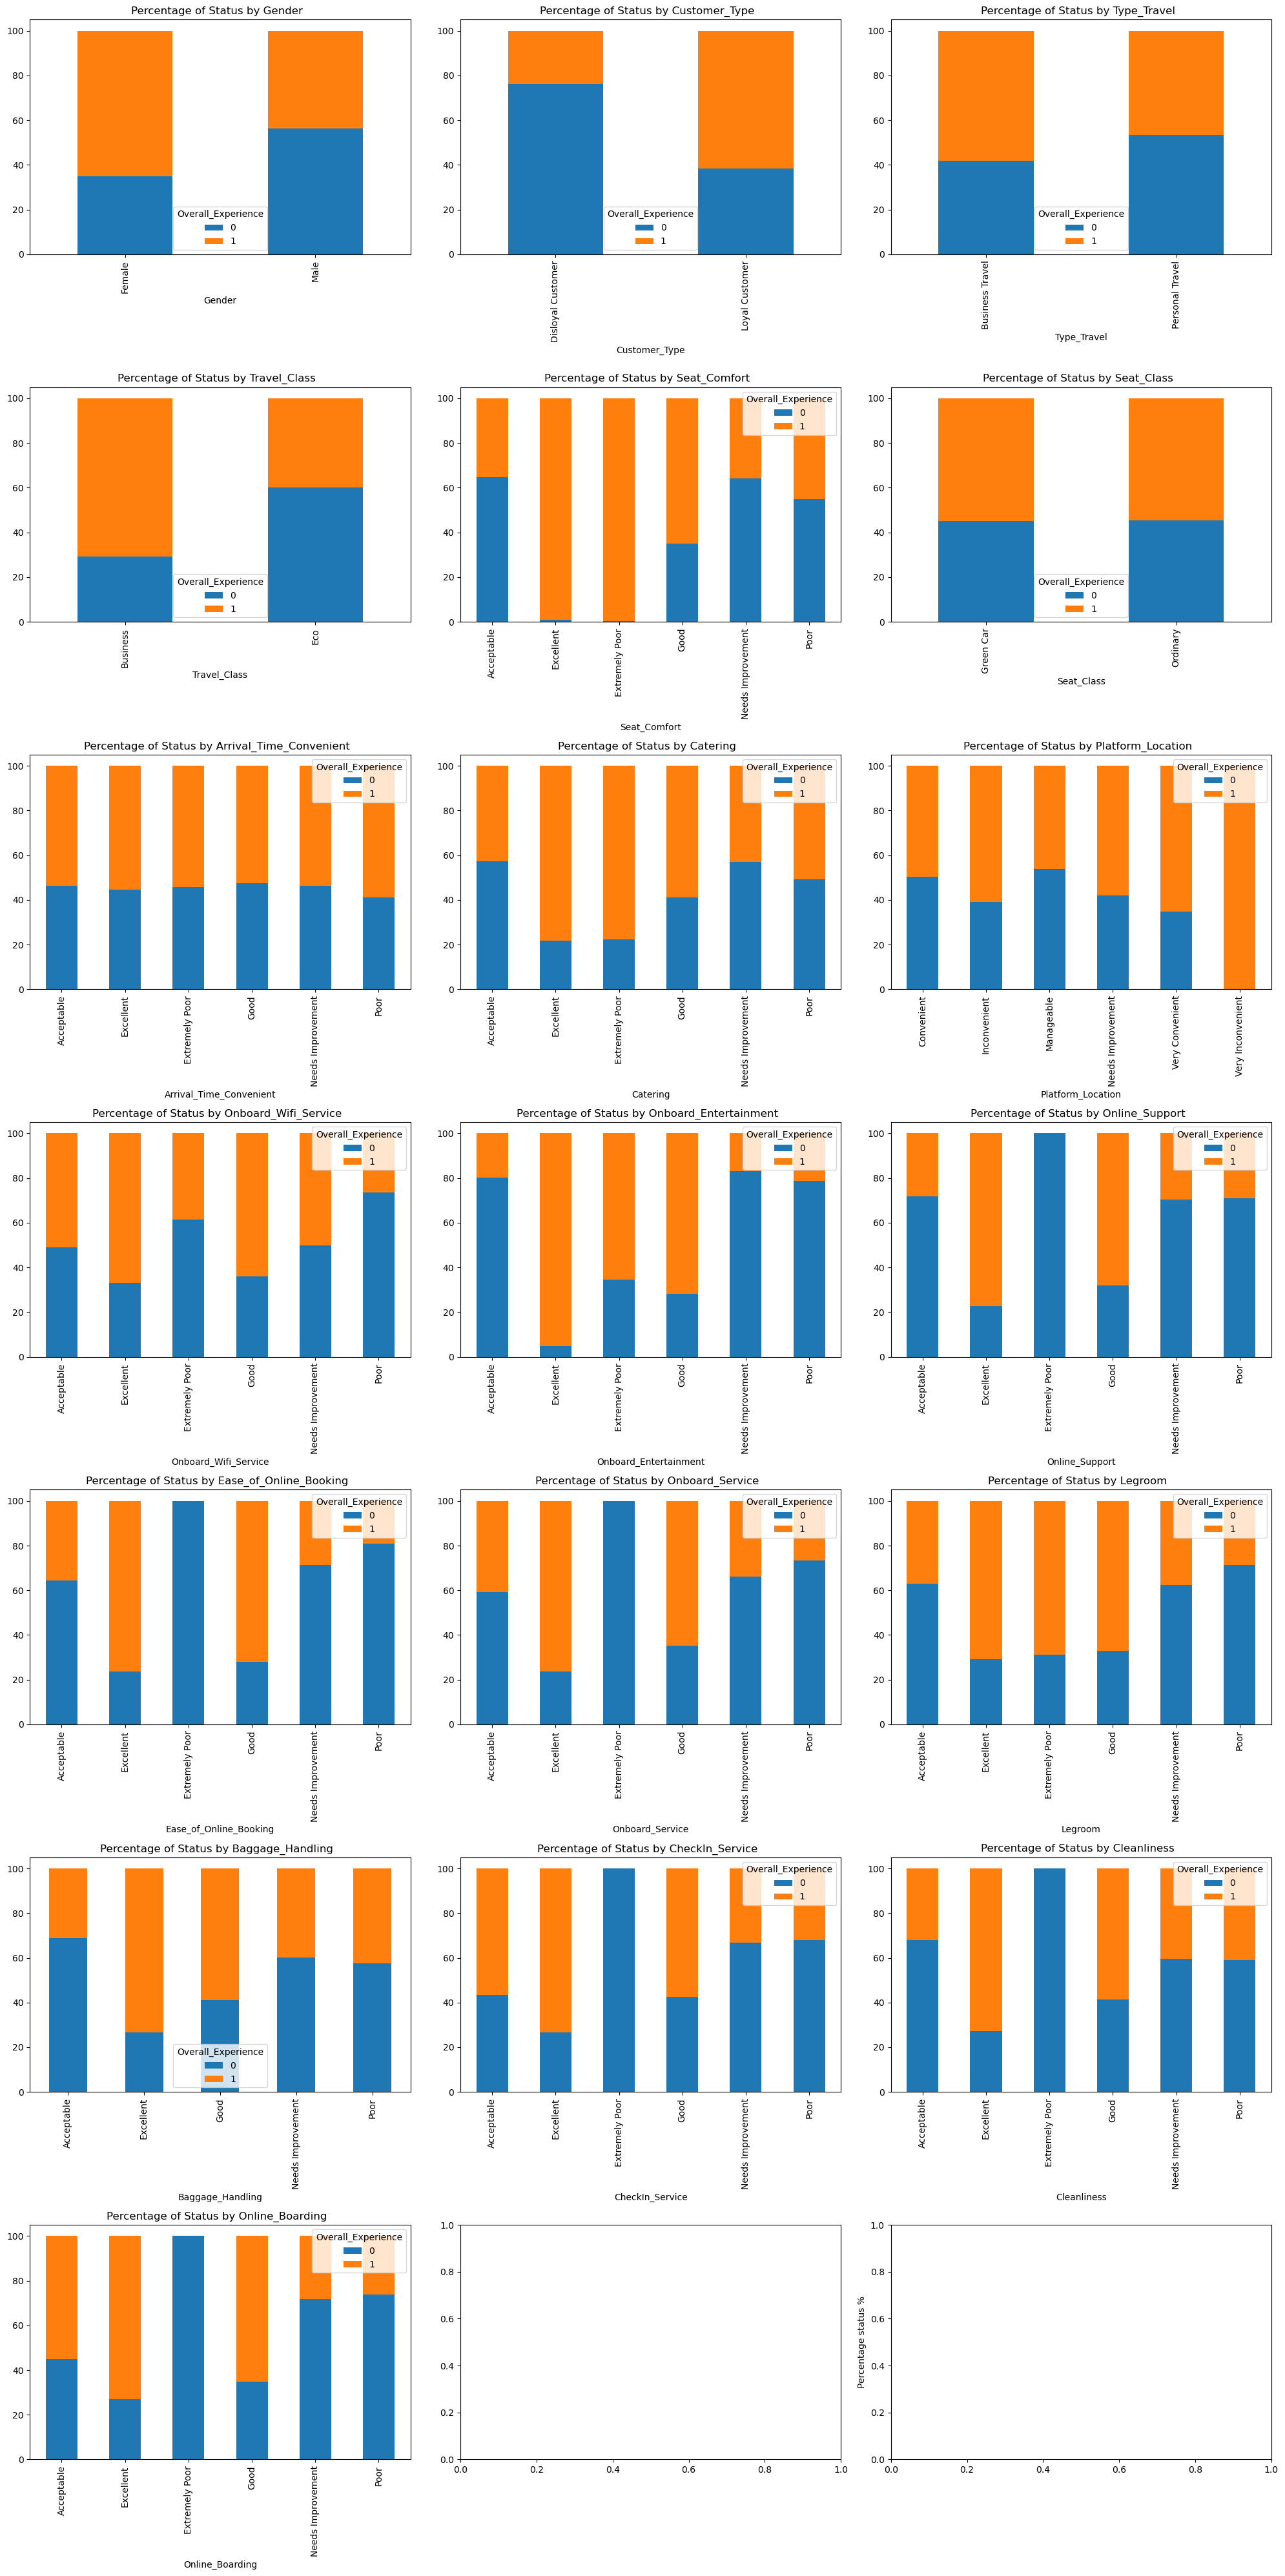

In [62]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 20))

# Plot each variable in a separate subplot
for i, var in enumerate(columns_cat[columns_cat!="Overall_Experience"]):
    row, col = divmod(i, 3)
    (pd.crosstab(df[var], df['Overall_Experience'], normalize = 'index')*100).plot(kind = 'bar',figsize = (20, 40), stacked = True, ax=axes[row, col])
    plt.ylabel('Percentage status %')
    axes[row, col].set_title(f'Percentage of Status by {var}  ')

# Adjust layout
plt.tight_layout()
plt.show()

**Observations**:
- Survey categorical variables seem to be very important for the predictive model

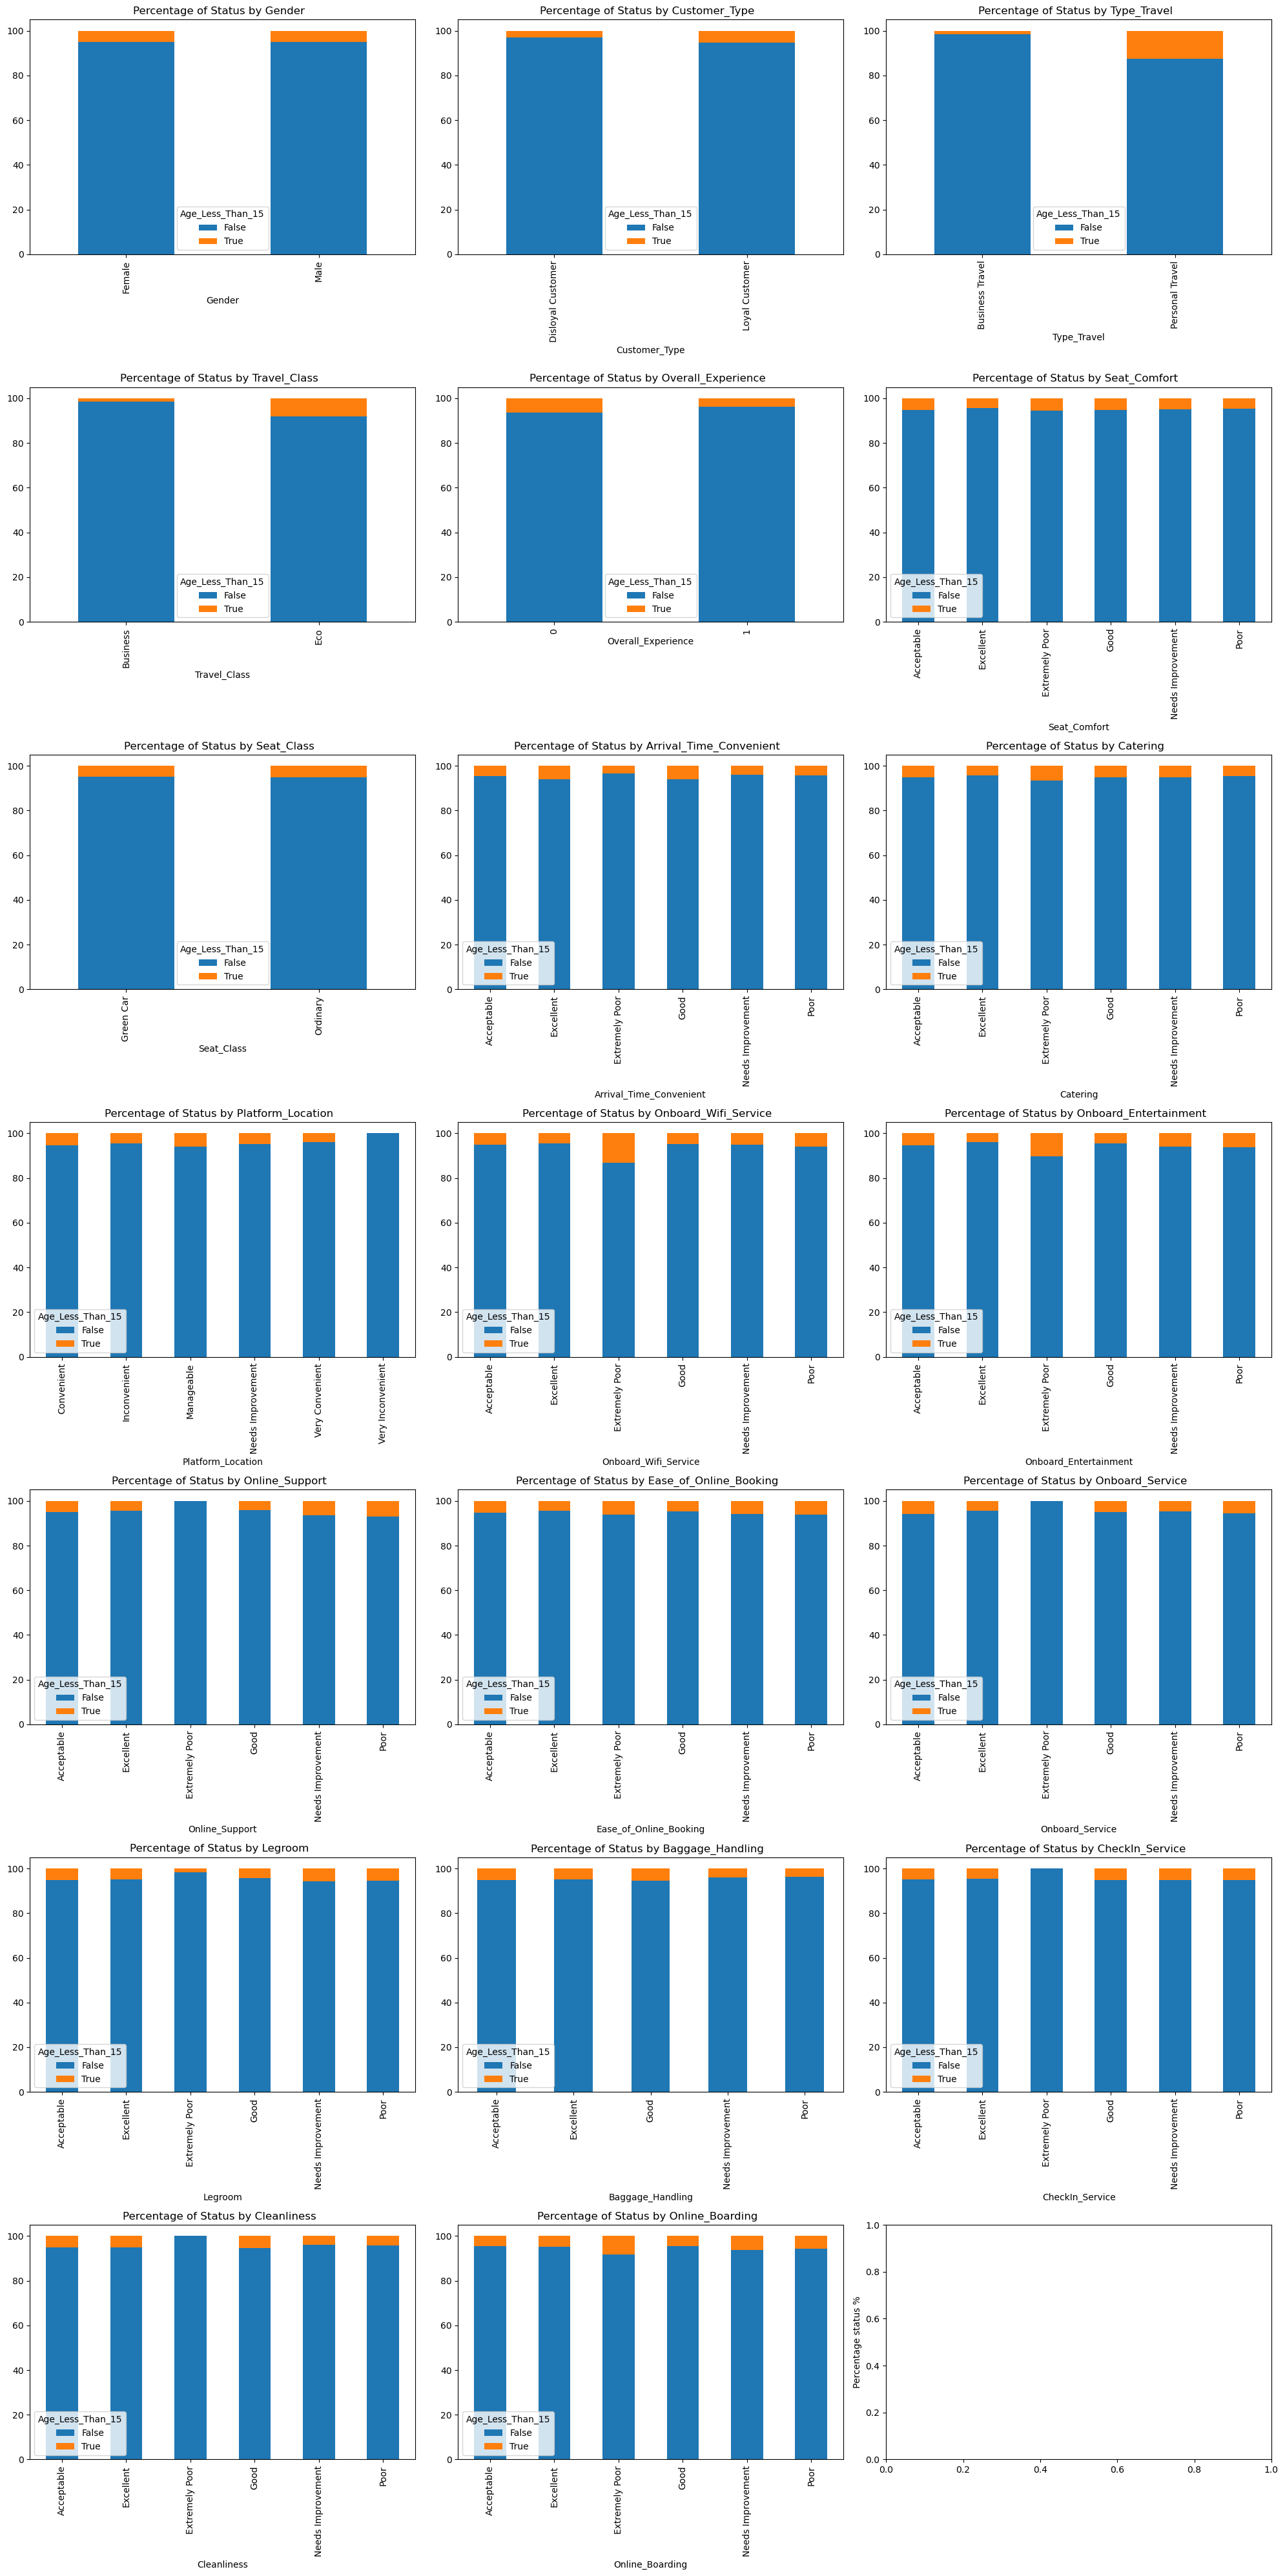

In [63]:
### Hacer analisis de hipotesis interesantes
### Los ninos responden diferente al resto

# Creating the new column for Age < 15
df['Age_Less_Than_15'] = df['Age'] < 15

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 20))

# Plot each variable in a separate subplot
for i, var in enumerate(columns_cat[columns_cat!="Age_Less_Than_15"]):
    row, col = divmod(i, 3)
    (pd.crosstab(df[var], df['Age_Less_Than_15'], normalize = 'index')*100).plot(kind = 'bar',figsize = (20, 40), stacked = True, ax=axes[row, col])
    plt.ylabel('Percentage status %')
    axes[row, col].set_title(f'Percentage of Status by {var}  ')

# Adjust layout
plt.tight_layout()
plt.show()

**Observations**:
-  Parece que los ninos no tienen un perfil diferente al del resto de la poblacion con diferentes edades. Parece que se puede continuar asi'

##### Can we use PCA for categorical variables?

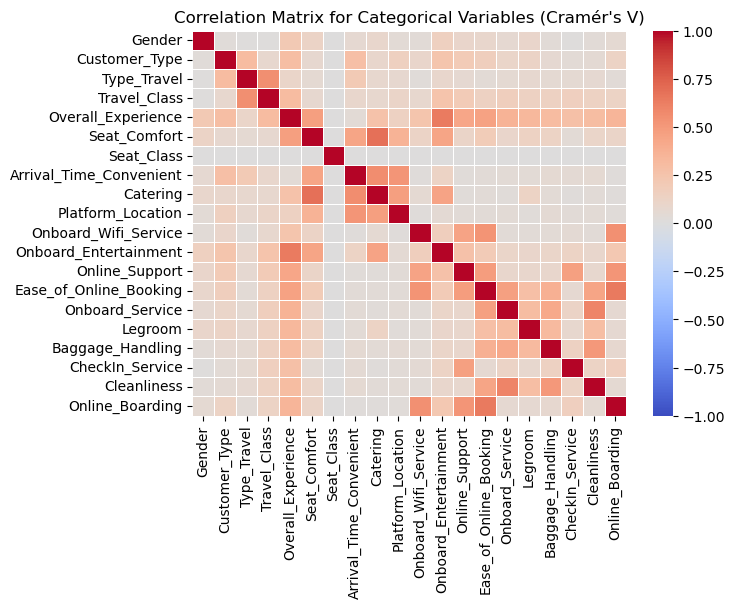

Overall_Experience         1.000000
Onboard_Entertainment      0.640505
Seat_Comfort               0.470998
Ease_of_Online_Booking     0.455444
Online_Support             0.434935
Onboard_Service            0.361157
Online_Boarding            0.351371
Legroom                    0.334250
Travel_Class               0.309976
Baggage_Handling           0.309035
Cleanliness                0.300996
Customer_Type              0.292494
CheckIn_Service            0.277570
Catering                   0.265498
Onboard_Wifi_Service       0.247766
Gender                     0.214632
Platform_Location          0.140806
Type_Travel                0.108419
Arrival_Time_Convenient    0.041714
Seat_Class                 0.000000
Name: Overall_Experience, dtype: float64


In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))    
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
df['Overall_Experience']=df['Overall_Experience'].astype(object) 
# List of categorical variables
categorical_vars = df.select_dtypes(include="object").columns

# Create an empty dataframe to store Cramér's V values
corr_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

# Calculate Cramér's V for each pair of variables
for col1 in categorical_vars:
    for col2 in categorical_vars:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1.0
        else:
            corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert the matrix to float
corr_matrix = corr_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1,linewidths=0.5)
plt.title('Correlation Matrix for Categorical Variables (Cramér\'s V)')
plt.show()
print(corr_matrix['Overall_Experience'].sort_values(ascending=False))


**observations**:
- In the overall experience the categorical variables have a high degree of asociation measured by the cramers V.
- Theres some correlation between onboard wifi,online support ease of online, onboard service and legroom Baggage handling. 
- Puede ser que sea util usar PCA si las variables categoricas lo permiten
- Se puede analizar cuales variables incluir en el PCA si tiene sentido 
- Investigue' que se pueden usar embedding techniques como Words2vec, que esta'n disenados para este problema, puede ser una mejora.

#### Pairplot con variables numericas


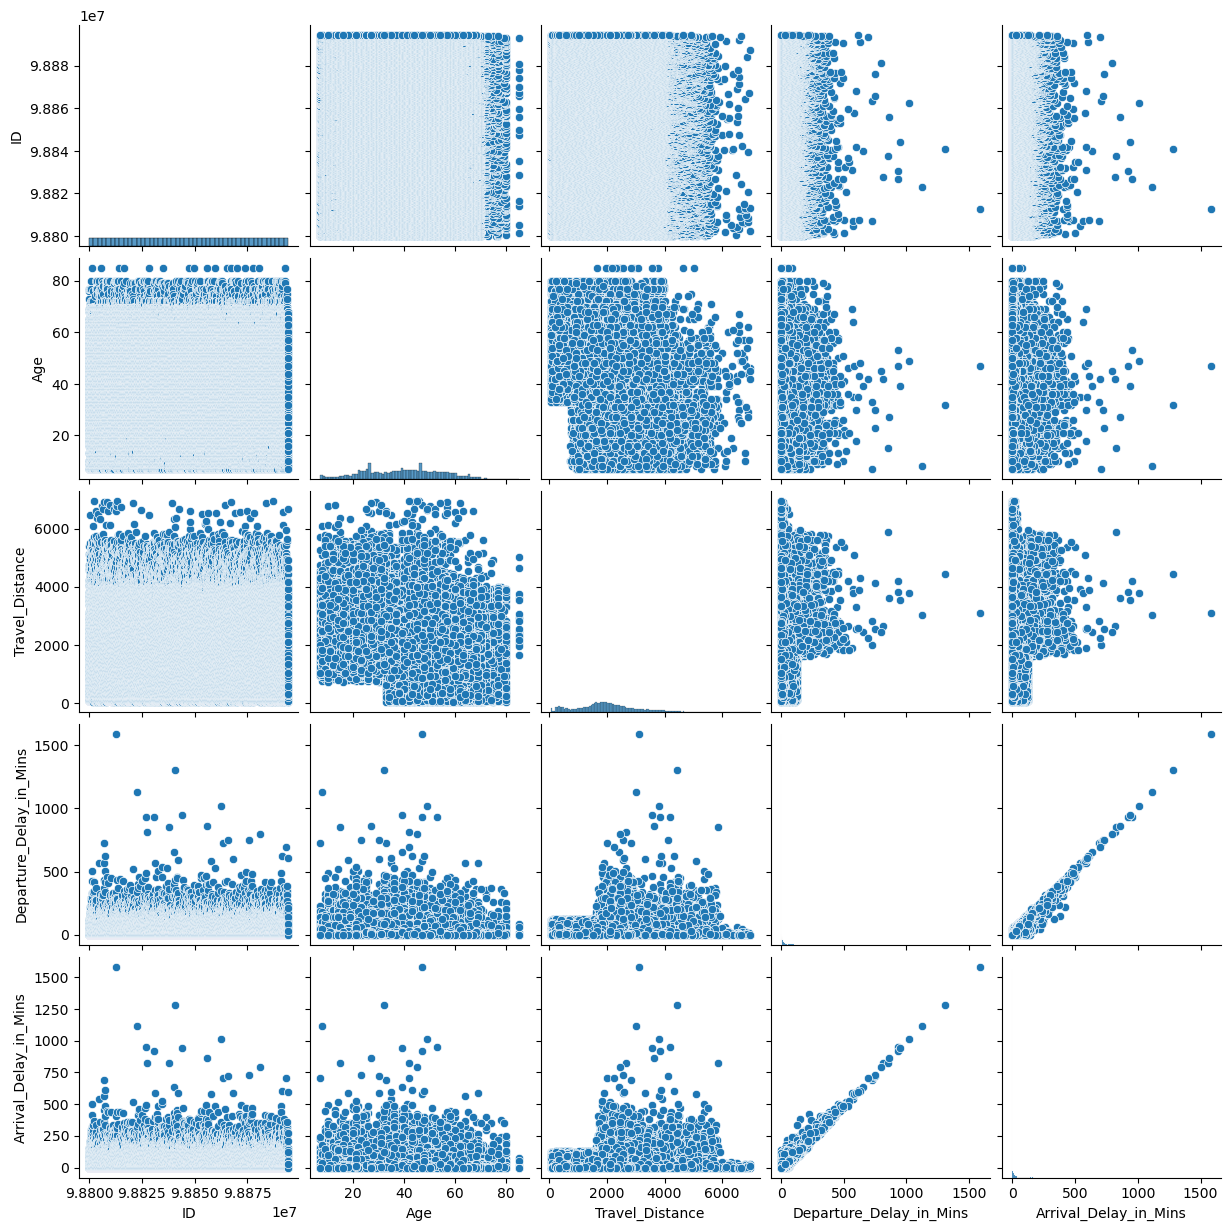

In [65]:
### make numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(numerical_df)

**Observations**:
- no parece haber una correlacion importante entre las variables predictivas numericas, excepto por el delay
- Aunque hay una pequena informacio'n de que el delay no tiene una relacio'n 1 a 1 con el departure y el arrival, esta'n demasiado correlacionadas y podri'amos quedarno con una de las 2 (PCA no se' porque el resto no tiene una correlacio'n importante)
- Hay un patron interesante en el travel distance y el arrival y departure delay, parece que a grandes distancias y a muy cortas distancias el delay es muy bajo... esto es raro porque uno esperari'a que en viajes largos el departure fuera mayor o igual cuando menos. 
- Convertir departure y arrival delay a la suma de los dos o probar las dos.

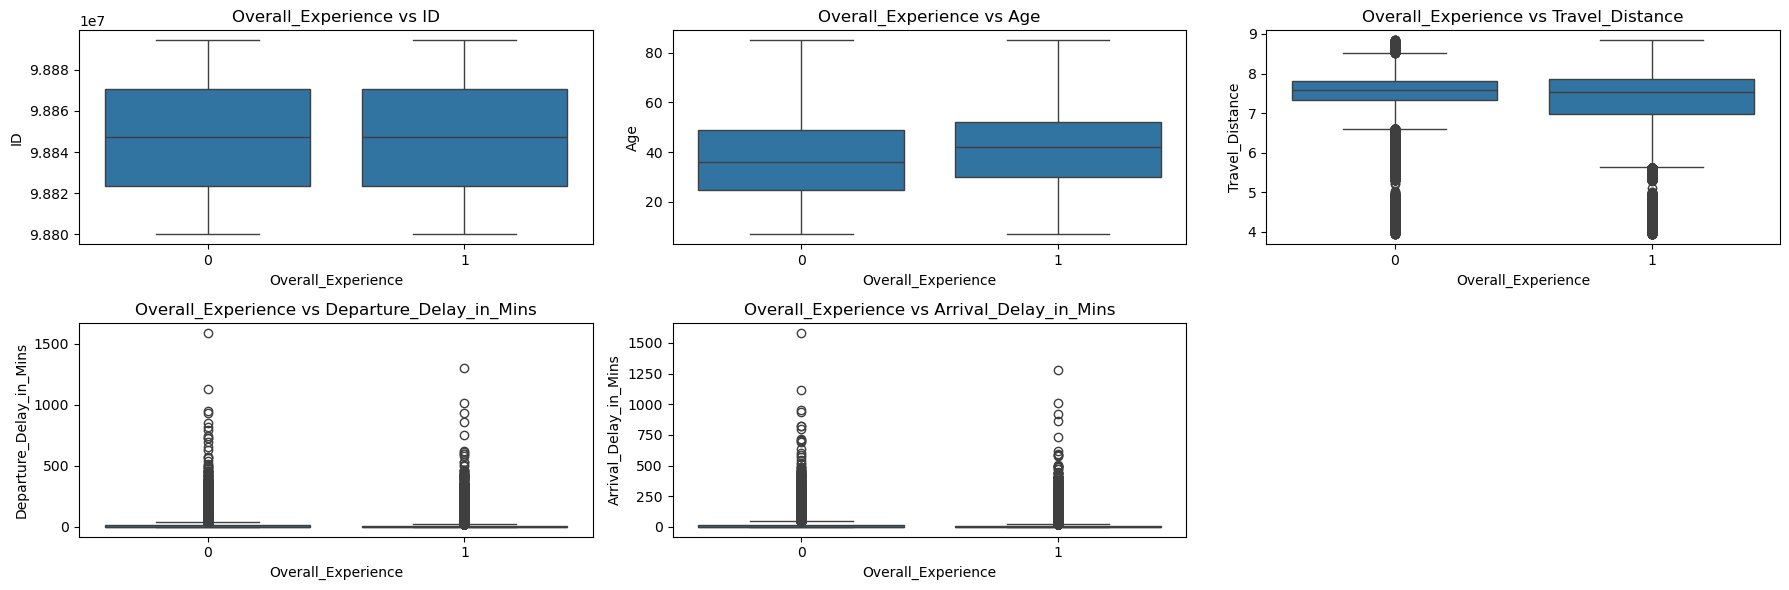

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numeric_vs_experience(df):
    # Create a copy of the DataFrame with the specified name
    new_df = df.copy()
    
    # Identificar las variables numéricas
    numeric_vars = new_df.select_dtypes(include='number').columns
    # Número de variables numéricas
    num_vars = len(numeric_vars)
    # Función para detectar outliers usando el rango intercuartílico (IQR)
    def detect_outliers_iqr(data):
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return np.where((data < lower_bound) | (data > upper_bound))[0]

    # Detectar outliers y aplicar la transformación logarítmica si es necesario para cada variable numérica
    for var in numeric_vars:
        if len(detect_outliers_iqr(new_df[var])) > 2:
            new_df[var] = np.log1p(new_df[var])

    # Configuración del tamaño de la figura
    fig, axes = plt.subplots(nrows=(num_vars // 3) + (num_vars % 3 > 0), ncols=3, figsize=(18, (num_vars // 3) * 6))

    # Aplanar la matriz de ejes para un acceso más sencillo
    axes = axes.flatten()

    # Graficar la relación entre 'Overall_Experience' y cada variable numérica
    for i, var in enumerate(numeric_vars):
        sns.boxplot(y=var, x='Overall_Experience', data=new_df, ax=axes[i])
        axes[i].set_title(f'Overall_Experience vs {var}')

    # Eliminar subplots vacíos
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage example:
plot_numeric_vs_experience(df)

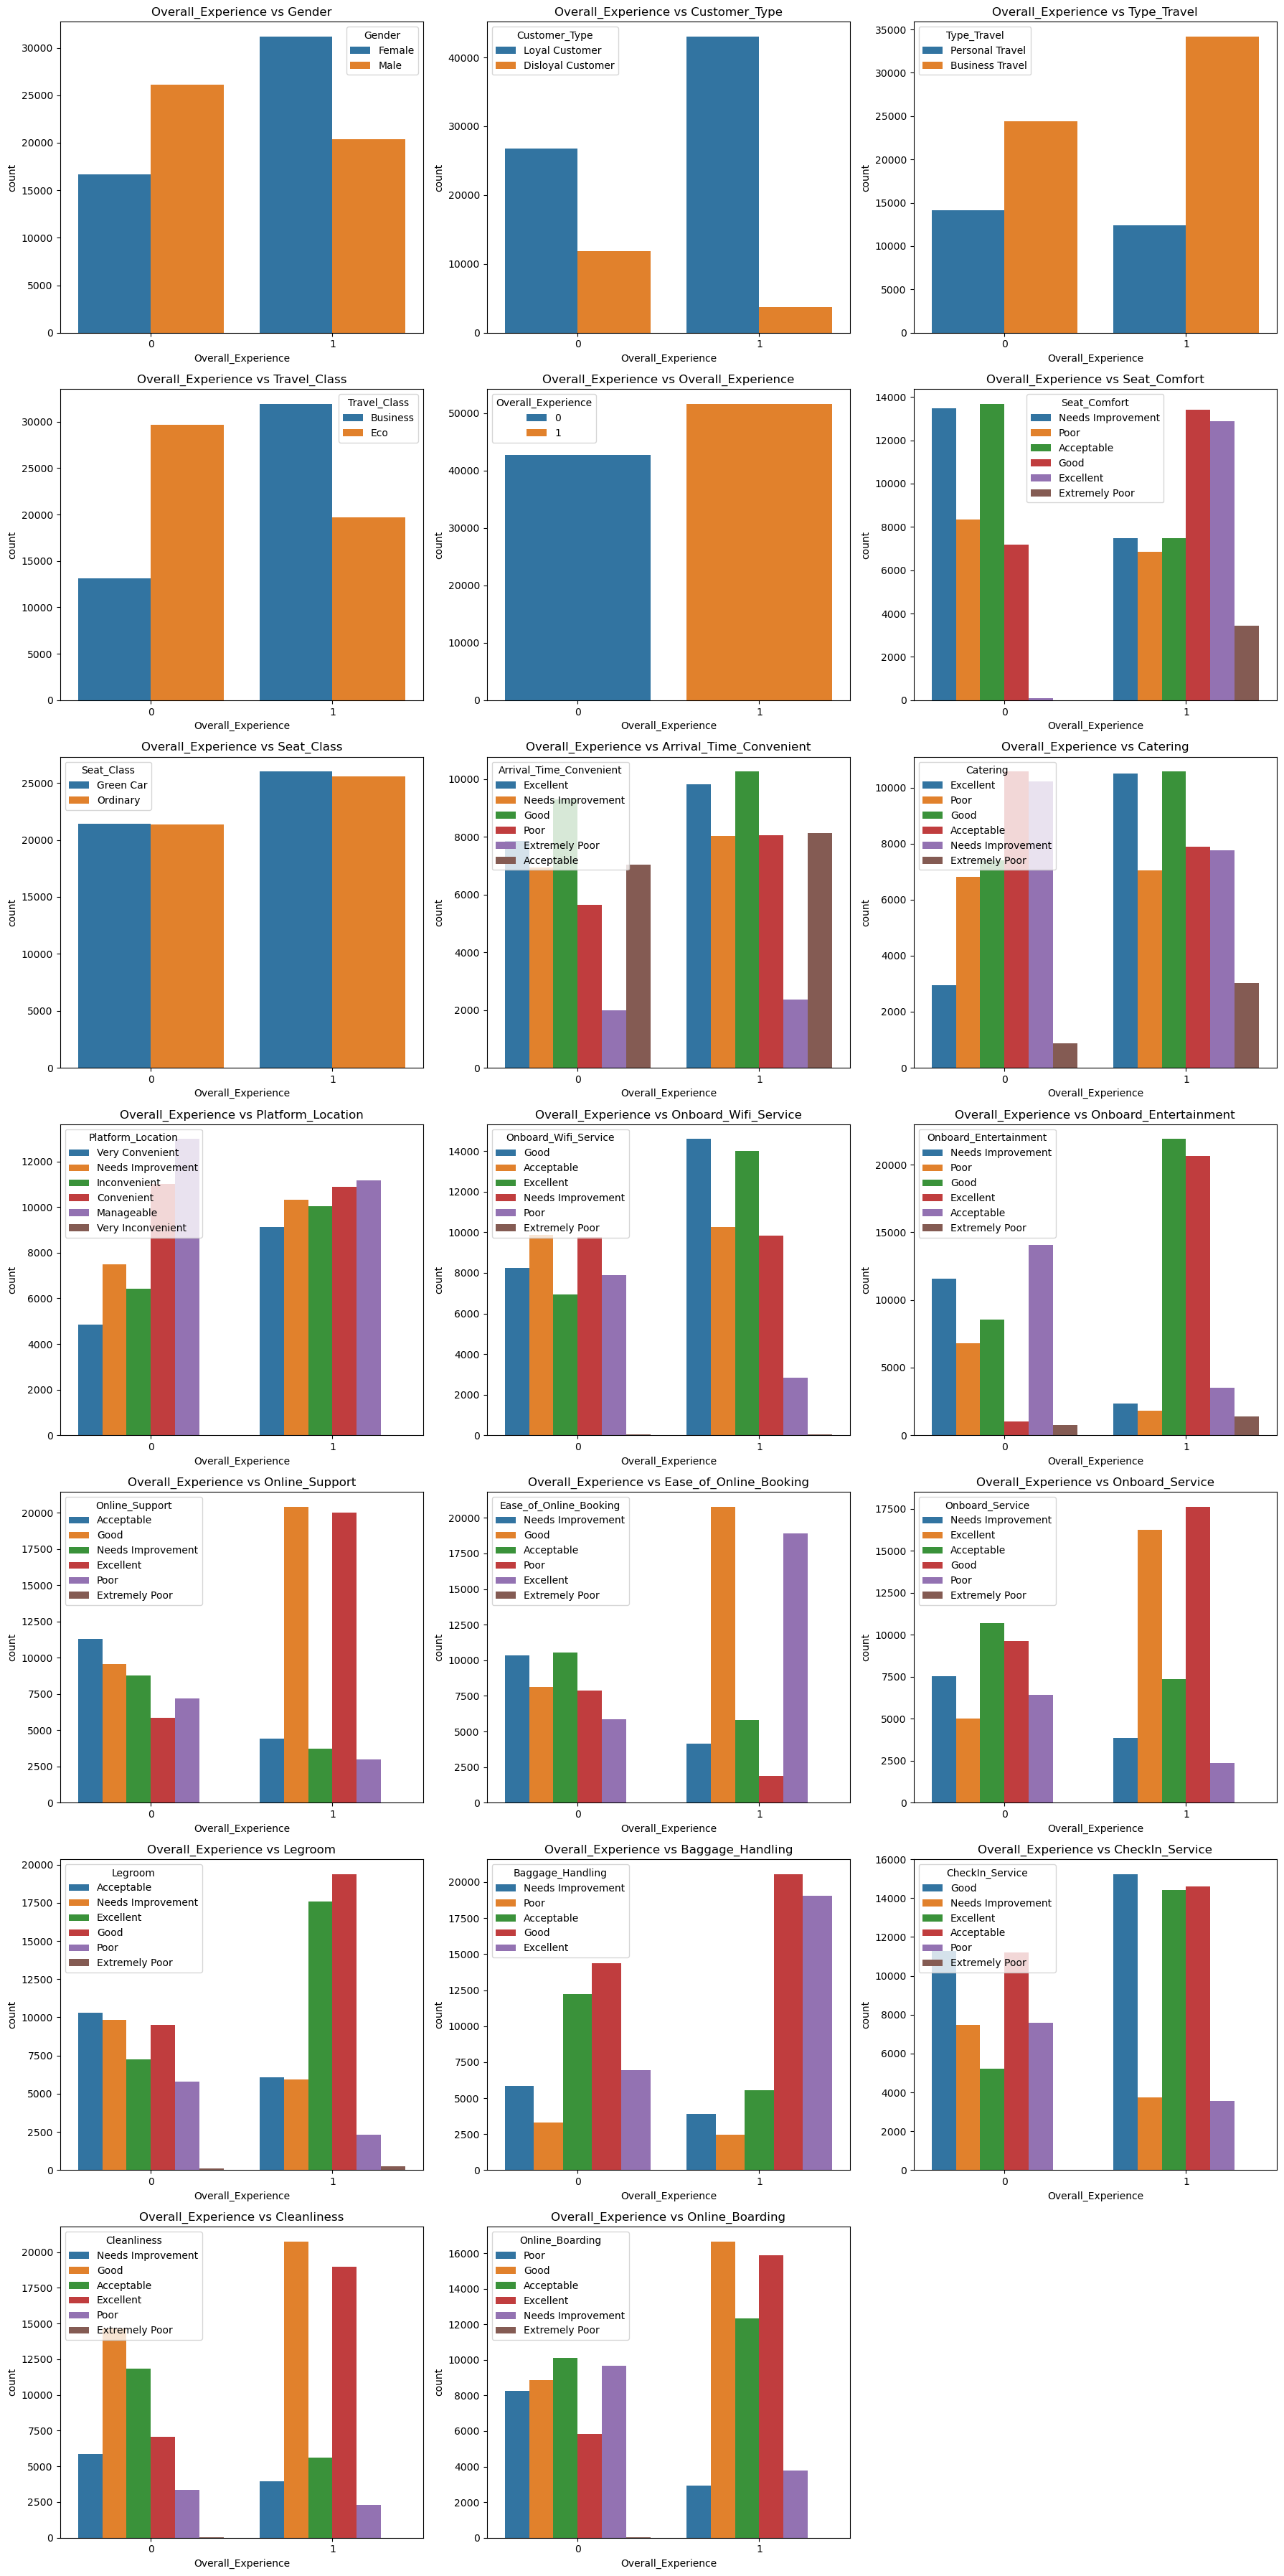

In [67]:
# Supongamos que tienes un DataFrame llamado 'df'
# df = pd.read_csv('tu_archivo.csv')

# Crear una copia del DataFrame original
df_copy = df.copy()

# Identificar las variables categóricas
categorical_vars = df_copy.select_dtypes(include=['object', 'category']).columns

# Identificar las variables numéricas
numerical_vars = df_copy.select_dtypes(include=[np.number]).columns


# Número de variables categóricas
num_vars = len(categorical_vars)

# Configuración del tamaño de la figura
fig, axes = plt.subplots(nrows=(num_vars // 3) + (num_vars % 3 > 0), ncols=3, figsize=(18, (num_vars // 3) * 6))

# Aplanar la matriz de ejes para un acceso más sencillo
axes = axes.flatten()

# Graficar la relación entre 'Overall_Experience' y cada variable categórica
for i, var in enumerate(categorical_vars):
    sns.countplot(hue=var, x='Overall_Experience', data=df_copy, ax=axes[i])
    axes[i].set_title(f'Overall_Experience vs {var}')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Modeling

In [68]:
#loafing libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_predict,cross_validate,cross_val_score
from sklearn.metrics import precision_recall_curve, precision_score,recall_score,classification_report,confusion_matrix,ConfusionMatrixDisplay, roc_curve,roc_auc_score, make_scorer,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


### Defininiendo Custom tranformators

#### DropMissing transformators

In [91]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class DropMissing(BaseEstimator, TransformerMixin):
    def __init__(self, axis=0, threshold=None):
        self.axis = axis  # Axis to drop along, 0 for rows, 1 for columns
        self.threshold = threshold  # Minimum number of non-NA values required to keep the row/column
        

    def fit(self, X, y=None):
        return self  # This transformer doesn't learn from the data, so we just return self

    def transform(self, X):
        X = pd.DataFrame(X)  # Convert the input to a pandas DataFrame
        if self.threshold is not None:
            if self.axis==0:
                X = X.dropna(axis=self.axis, thresh=X.shape[1]-self.threshold) # Drop rows/columns based on the threshold
            else:
                X = X.dropna(axis=self.axis, thresh=X.shape[0]-self.threshold)
                
        
        return X.values  # Convert the DataFrame back to a NumPy array




[[ 1.  2. nan  4.]
 [nan  2.  3.  4.]
 [ 1.  2.  3.  4.]]


In [ ]:
# Example usage in a pipeline
from sklearn.pipeline import Pipeline


data = np.array([[1, 2, np.nan, 4],
                 [np.nan, 2, 3, 4],
                 [1, np.nan, np.nan, 4],
                 [1, 2, 3, 4]])

pipeline = Pipeline([
    ('drop_missing', DropMissing(axis=0, threshold=1))#, # Drop columns with less than 3 non-NA values #! esto es cant de nas > thresh, no >= thresh
   
])

transformed_data = pipeline.fit_transform(data)
print(transformed_data)

### Separando data en training y tests set


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Overall_Experience"]):
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

In [ ]:
print(train_set.shape)
print(test_set.shape)

### Separando varibles predictivas de la varible target

In [ ]:
#Separando variables en training 
X_train=train_set.drop(columns=["Overall_Experience"])
Y_train=train_set["Overall_Experience"].copy()

#separando varibles en el test
X_test=test_set.drop(columns=["Overall_Experience"])
Y_test=test_set["Overall_Experience"].copy()